In [195]:
import numpy as np
from scipy import stats
from nolds import lyap_r
from nolds import lyap_e
from gtda.time_series import takens_embedding_optimal_parameters
from matplotlib import pyplot as plt
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
from trajectories import generate_trajectories


In [ ]:
tseriesChaos = importr("tseriesChaos")
lyap_k = tseriesChaos.lyap_k

In [164]:
# USE THIS WHEN RUNNING AN INTERACTIVE NOTEBOOK
SEED = 42
LENGTH = 1000
SAMPLES = 500

# WARNING: ONLY RUN THIS VIA EXPORTED PYTHON SCRIPT
# n_args = len(sys.argv)
# SEED = int(sys.argv[1]) if n_args > 1 else 42
# LENGTH = int(sys.argv[2]) if n_args > 2 else 200
# SAMPLES = int(sys.argv[3]) if n_args > 3 else 50

print(f"Experiment config -- SEED:{SEED}, LENGTH:{LENGTH}, SAMPLES:{SAMPLES}")


Experiment config -- SEED:42, LENGTH:1000, SAMPLES:500


In [197]:
experimental_data = generate_trajectories(RANDOM_SEED=SEED, TS_LENGTH=LENGTH, CONTROL_PARAM_SAMPLES=SAMPLES)


Experiment config -- SEED:42, LENGTH:1000, SAMPLES:500


In [227]:
logistic_trajectories = experimental_data["logistic"]["trajectories"]
logistic_control_params = experimental_data["logistic"]["sys_params"]
logistic_lces = experimental_data["logistic"]["lces"]

In [310]:
henon_trajectories = experimental_data["henon"]["trajectories"]
henon_control_params = experimental_data["henon"]["sys_params"]
henon_lces = experimental_data["henon"]["lces"]

In [311]:
ikeda_trajectories = experimental_data["ikeda"]["trajectories"]
ikeda_control_params = experimental_data["ikeda"]["sys_params"]
ikeda_lces = experimental_data["ikeda"]["lces"]

In [312]:
tinkerbell_trajectories = experimental_data["tinkerbell"]["trajectories"]
tinkerbell_control_params = experimental_data["tinkerbell"]["sys_params"]
tinkerbell_lces = experimental_data["tinkerbell"]["lces"]

In [202]:
def get_best_params(ts, max_delay=50, max_dim=8):
    delay, dim = takens_embedding_optimal_parameters(ts, max_delay, max_dim)
    return delay, dim

In [196]:
def trajectories_to_r_vecs(trajectories):
    return [robjects.FloatVector(ts) for ts in trajectories]

In [313]:
def kantz_estimator(
    ts,
    dim=None,
    delay=None,
    theiler_window=5,
    k_neighbours=2,
    max_num_points=200,
    num_iterations=20,
    neighbour_radius=1.0,
):
    """Use R's `tseriesChaos` package and function `lyap_k` to estimate max of Lyapunov spectrum."""
    if dim is None or delay is None:
        delay_, dim_ = get_best_params(ts)
        if dim is None:
            dim = dim_
        if delay is None:
            delay = delay_
    num_points = min(max_num_points, len(ts) - (((dim - 1) * delay) + 1))
    lyapunov_spectrum_estimate = lyap_k(
        ts,
        dim,
        delay,
        t=theiler_window,
        k=k_neighbours,
        ref=num_points,
        s=num_iterations,
        eps=neighbour_radius,
    )
    return np.max(lyapunov_spectrum_estimate)


In [314]:
rosenstein_logistic = [lyap_r(ts) for ts in logistic_trajectories]
eckmann_logistic = [np.max(lyap_e(ts)) for ts in logistic_trajectories]
kantz_logistic = [kantz_estimator(ts) for ts in trajectories_to_r_vecs(logistic_trajectories)]

/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:45: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  warnings.warn(
/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:45: RuntimeWarning: RANSAC did not reach consensus, using

Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping 

In [319]:
# rosenstein_henon = [lyap_r(ts) for ts in henon_trajectories]
eckmann_henon = [np.max(lyap_e(ts)) for ts in henon_trajectories]
kantz_henon = [kantz_estimator(ts) for ts in trajectories_to_r_vecs(henon_trajectories)]

Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping 

In [323]:
rosenstein_ikeda = [lyap_r(ts) for ts in ikeda_trajectories]
eckmann_ikeda = [np.max(lyap_e(ts)) for ts in ikeda_trajectories]
kantz_ikeda = [kantz_estimator(ts) for ts in trajectories_to_r_vecs(ikeda_trajectories)]

/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:240: RuntimeWa

Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping 

In [328]:
rosenstein_tinkerbell = [lyap_r(ts) for ts in tinkerbell_trajectories]
eckmann_tinkerbell = [np.max(lyap_e(ts)) for ts in tinkerbell_trajectories]
kantz_tinkerbell = [kantz_estimator(ts) for ts in trajectories_to_r_vecs(tinkerbell_trajectories)]

/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/colin/miniconda3/envs/chaos-chapter/lib/python3.10/site-packages/nolds/measures.py:240: RuntimeWa

Finding nearests
Keeping  193  reference points
Following points
Finding nearests
Keeping  190  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  196  reference points
Following points
Finding nearests
Keeping  198  reference points
Following points
Finding nearests
Keeping  196  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  199  reference points
Following points
Finding nearests
Keeping  85  reference points
Following points
Finding nearests
Keeping  69  reference points
Following points
Finding nearests
Keeping  103  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  188  reference points
Following points
Finding nearests
Keeping  179  reference points
Following points
Finding nearests
Keeping  4

In [339]:
def plot_lce_estimate_and_correlation(
    lce_estimate_name,
    system_name,
    control_param_name,
    lce_estimate,
    lce_actual,
    lce_actual_name = "Benettin (true)",
    sequence_length = 1000,
    logy = False,
    show_plot = True,
):
    
    lce_estimate = np.array(lce_estimate)
    lce_actual = np.array(lce_actual)

    lce_estimate_name = lce_estimate_name.capitalize()
    system_name = system_name.capitalize()
    sequence_length = 1000
    pos_mask = lce_actual > 0
    num_samples = len(lce_actual)

    count_finite = np.sum(np.isfinite(lce_estimate))
    count_all = len(lce_estimate)
    count_finite_pos = np.sum(np.isfinite(lce_estimate[pos_mask]))
    count_all_pos = np.sum(pos_mask)

    lce_spearmanr_all = stats.spearmanr(lce_estimate, lce_actual)
    lce_spearmanr_pos = stats.spearmanr(lce_estimate[pos_mask], lce_actual[pos_mask])

    if show_plot:
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6), dpi=300)

        ax1.plot(
            logistic_control_params,
            lce_estimate,
            lw=0.5,
            label=lce_estimate_name + " $\lambda_{\max}$",
        )
        ax1.plot(
            logistic_control_params,
            lce_actual,
            lw=0.5,
            label=lce_actual_name + " $\lambda_{\max}$",
        )
        ax1.axhline(0, linestyle="--", c="orange")
        ax1.legend()
        ax1.set_xlabel(f"{system_name} control parameter ${control_param_name}$")
        ax1.set_ylabel("$\lambda_{\max}$")
        ax1.title.set_text(
            f"Finite estimates (all): {count_finite}/{count_all}. Finite estimates (chaos): {count_finite_pos}/{count_all_pos}."
        )

        ax2.scatter(lce_actual, lce_estimate, s=0.8, label="Eckmann $\lambda_{\max}$")
        # ax2.scatter(lce_actual, lce_actual, s=0.8, label="Benettin (true) $\lambda_{\max}$")
        ax2.axvline(0, linestyle="--", c="orange")
        ax2.axhline(0, linestyle="--", c="orange")
        ax2.legend()
        ax2.set_xlabel("Largest Lyapunov Exponent: $\lambda_{\max}$")
        ax2.title.set_text(
            f"Spearman correlation: {lce_spearmanr_all[0]:.3f} (all), {lce_spearmanr_pos[0]:.3f} (chaos)"
        )

        if logy:
            plt.yscale("symlog")

        plt.suptitle(
            lce_estimate_name
            + " estimate of $\lambda_{\max}$ for "
            + system_name
            + f" map with {num_samples} trajectories of length $n={sequence_length}$."
        )
        plt.tight_layout()
        plt.show()

    return lce_spearmanr_all, lce_spearmanr_pos


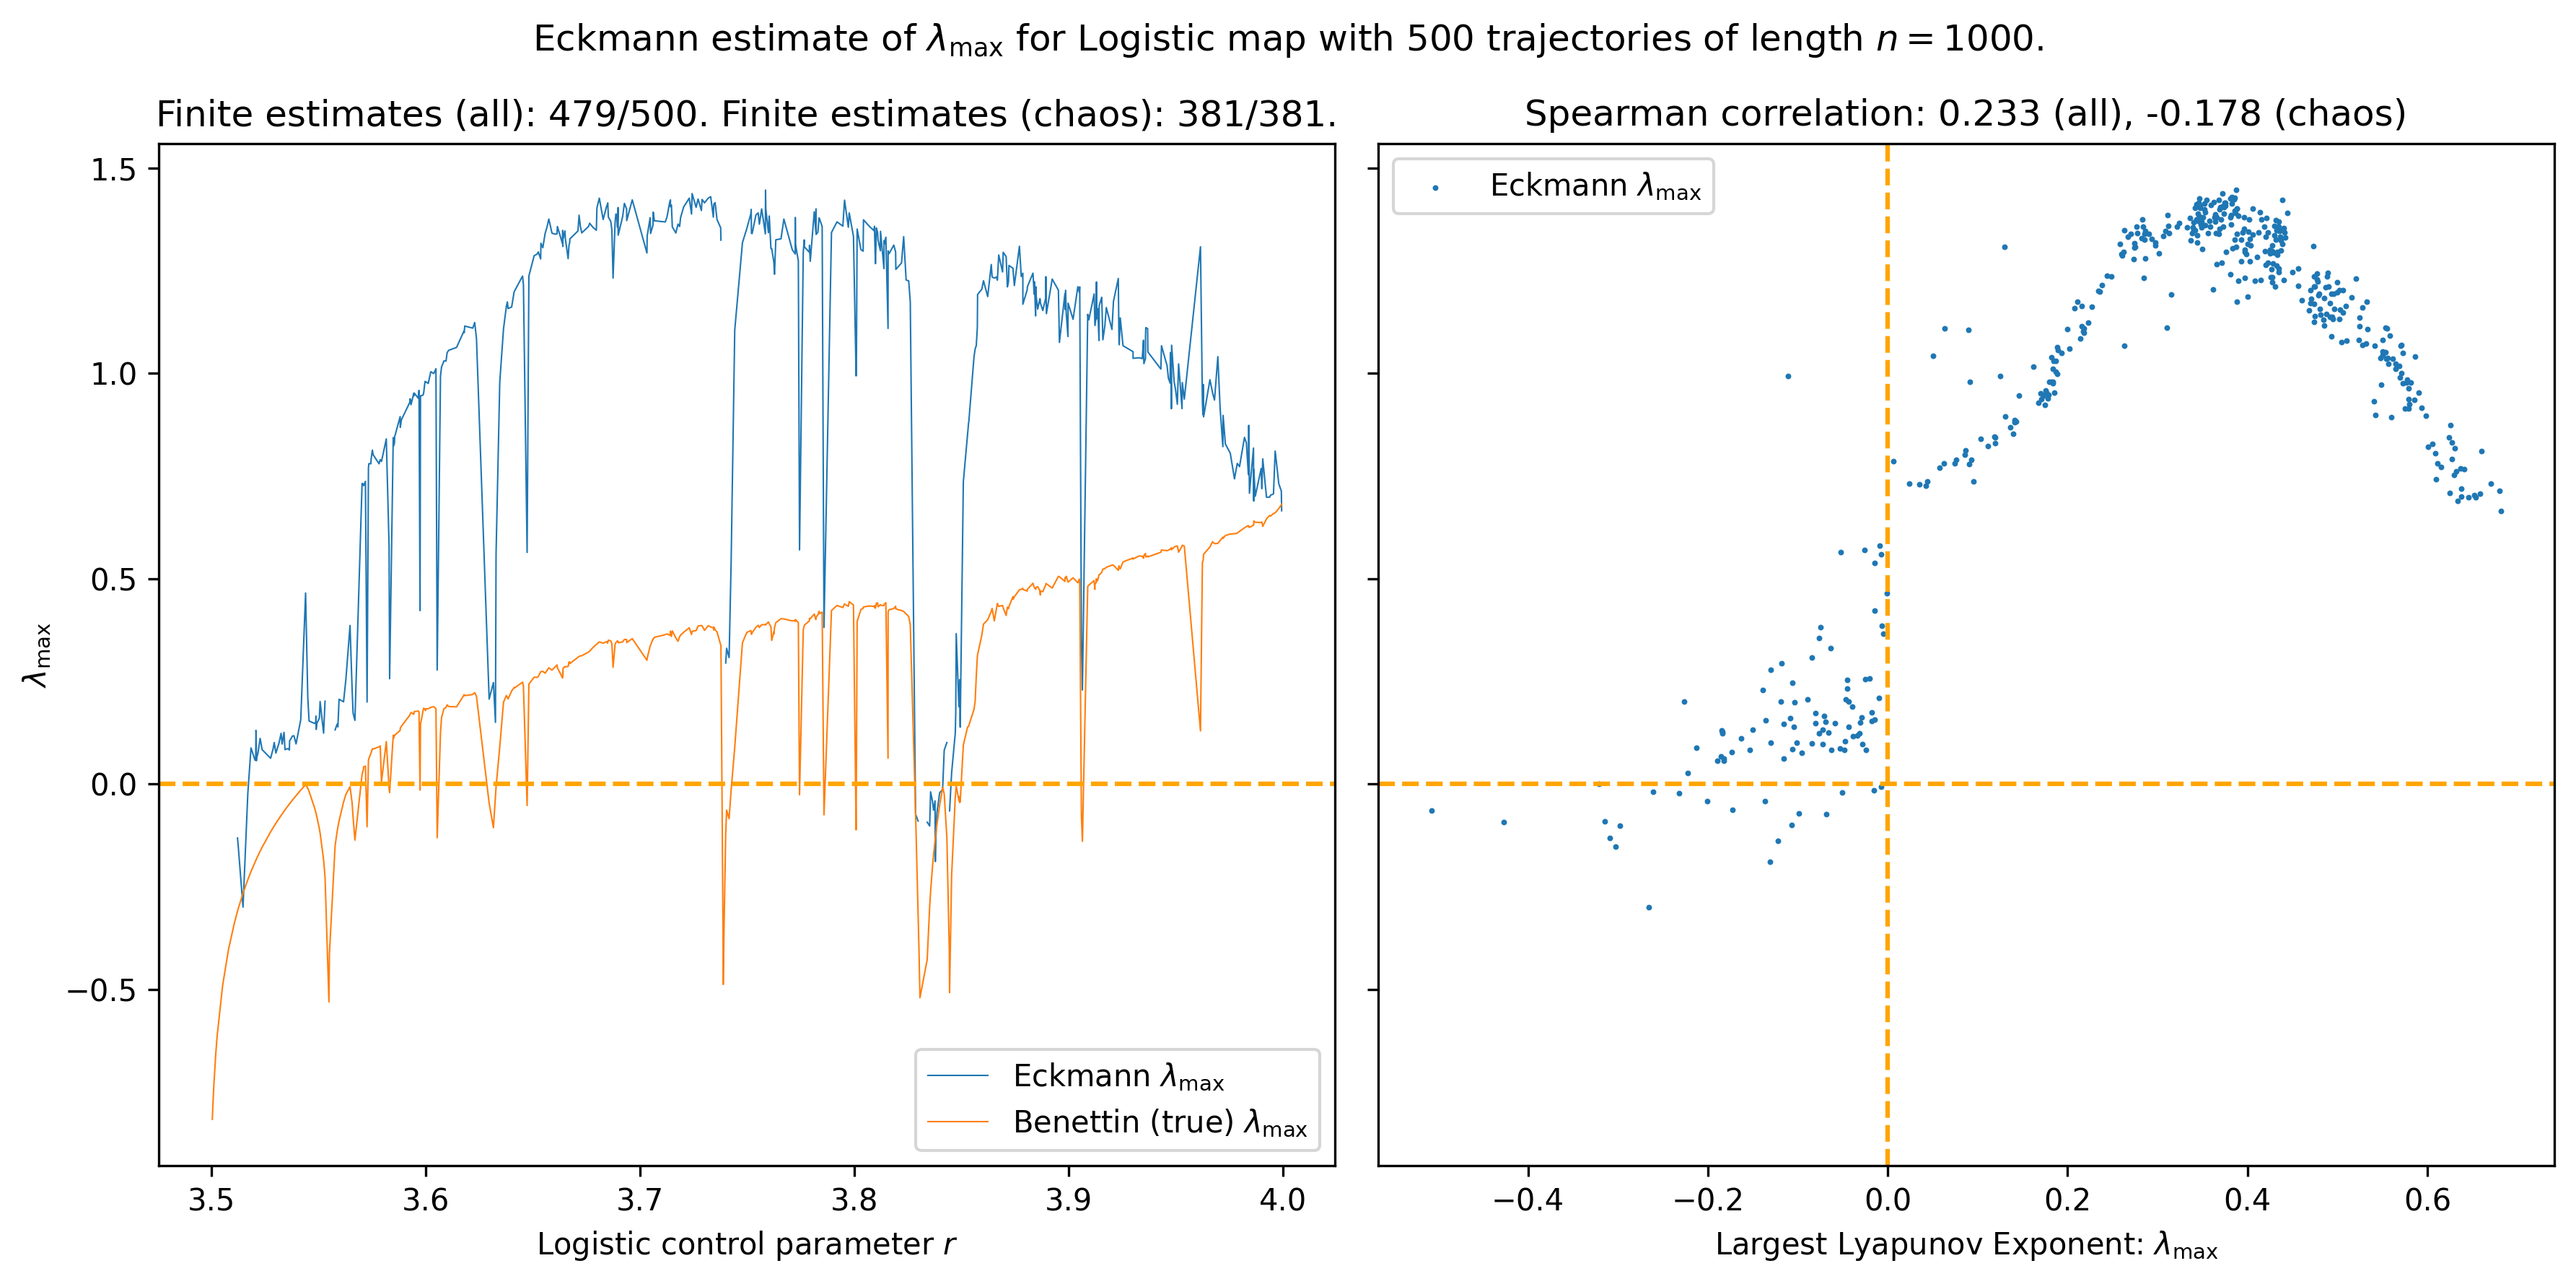

(SpearmanrResult(correlation=0.23298339915916863, pvalue=1.3693557868359535e-07),
 SpearmanrResult(correlation=-0.17801437675071544, pvalue=0.0004808392939976976))

In [340]:
plot_lce_estimate_and_correlation("Eckmann", "Logistic", "r", eckmann_logistic, logistic_lces)

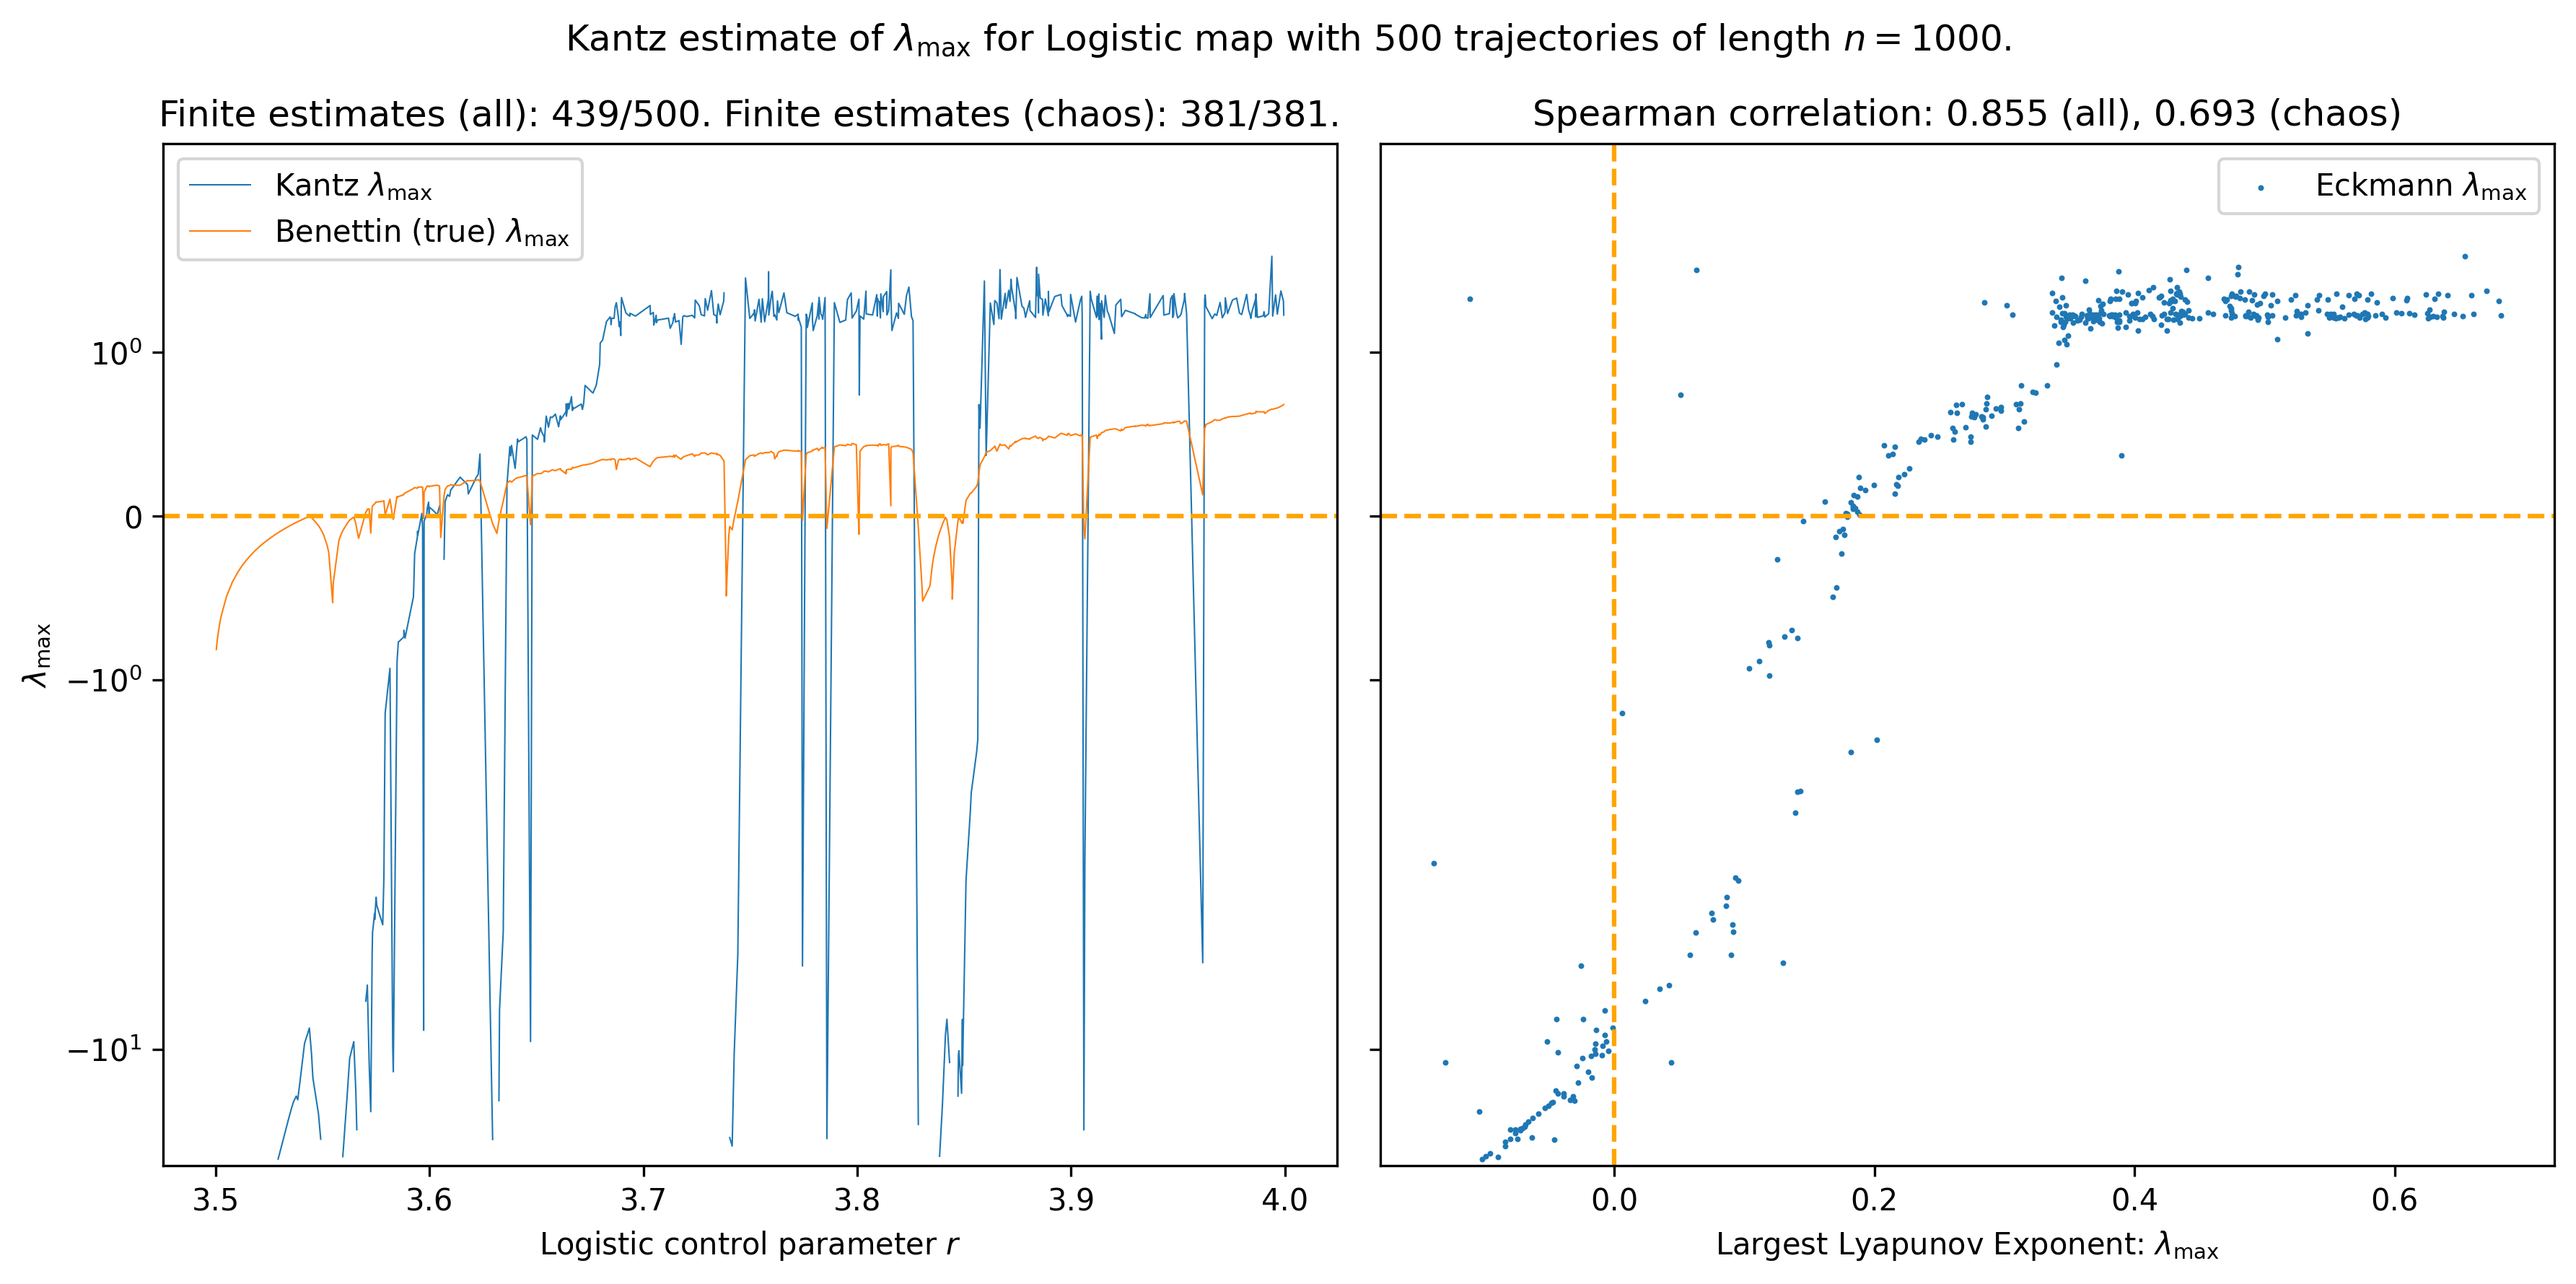

(SpearmanrResult(correlation=0.854908075087437, pvalue=4.811845081297017e-144),
 SpearmanrResult(correlation=0.6929684974277635, pvalue=8.327682215433633e-56))

In [341]:
plot_lce_estimate_and_correlation("Kantz", "Logistic", "r", kantz_logistic, logistic_lces, logy=True)

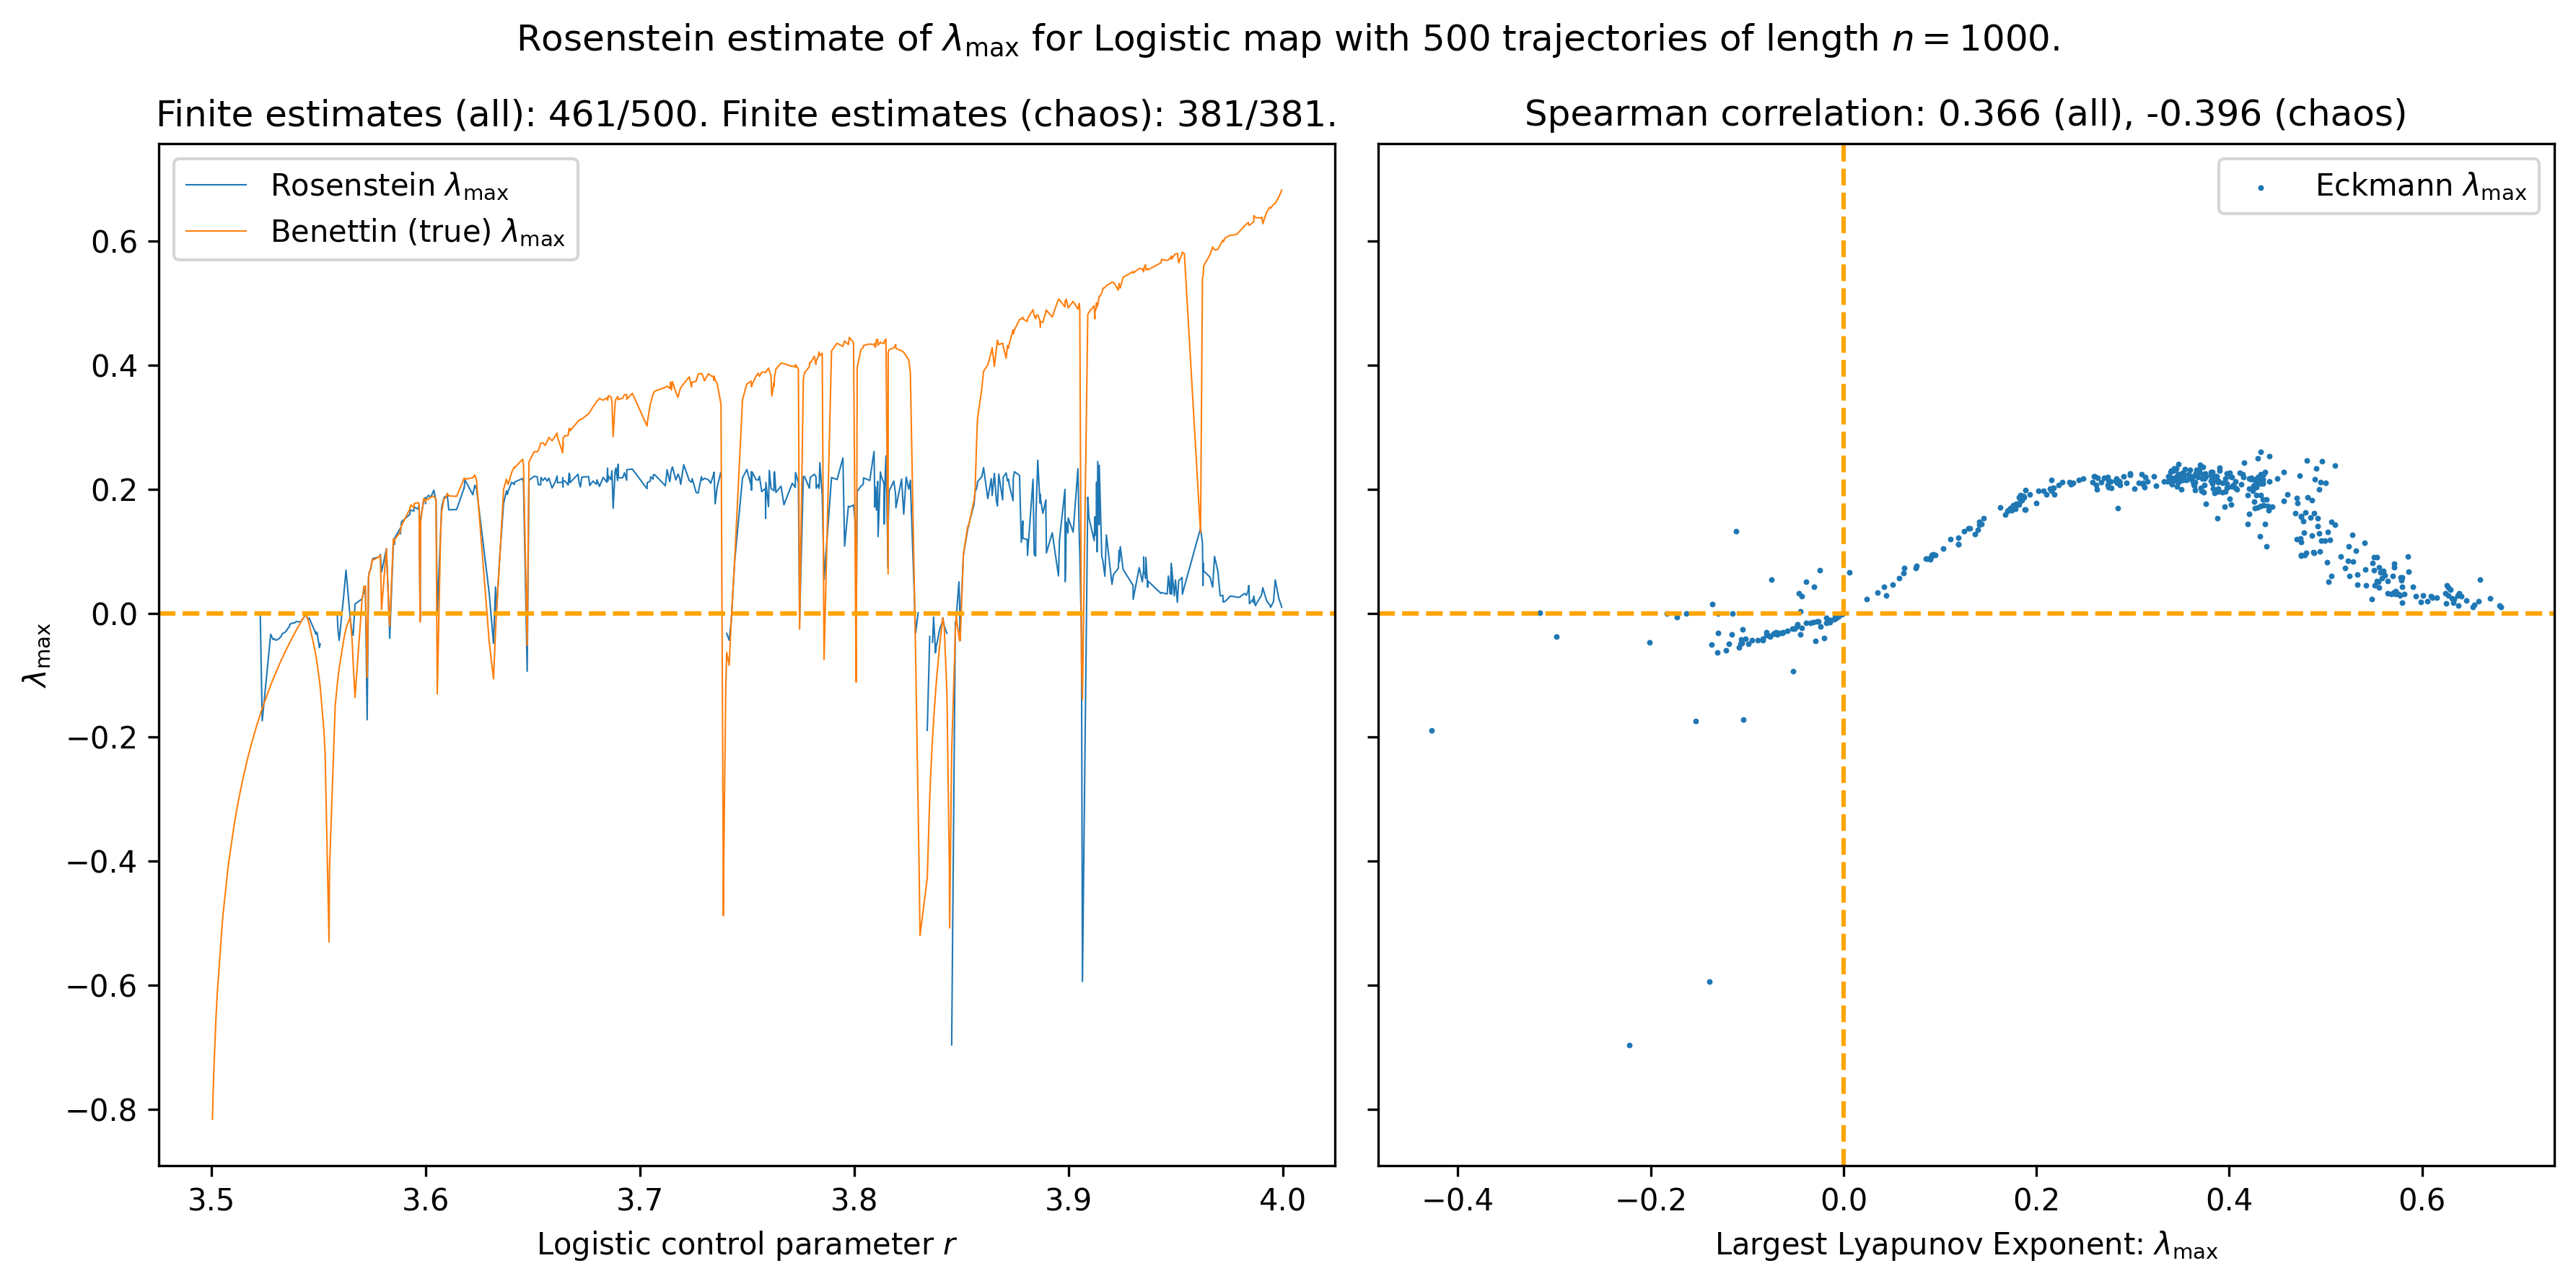

(SpearmanrResult(correlation=0.36647083775345934, pvalue=2.4435200995498567e-17),
 SpearmanrResult(correlation=-0.3955027631741678, pvalue=1.0231307930697287e-15))

In [342]:
plot_lce_estimate_and_correlation("Rosenstein", "Logistic", "r", rosenstein_logistic, logistic_lces, logy=False)

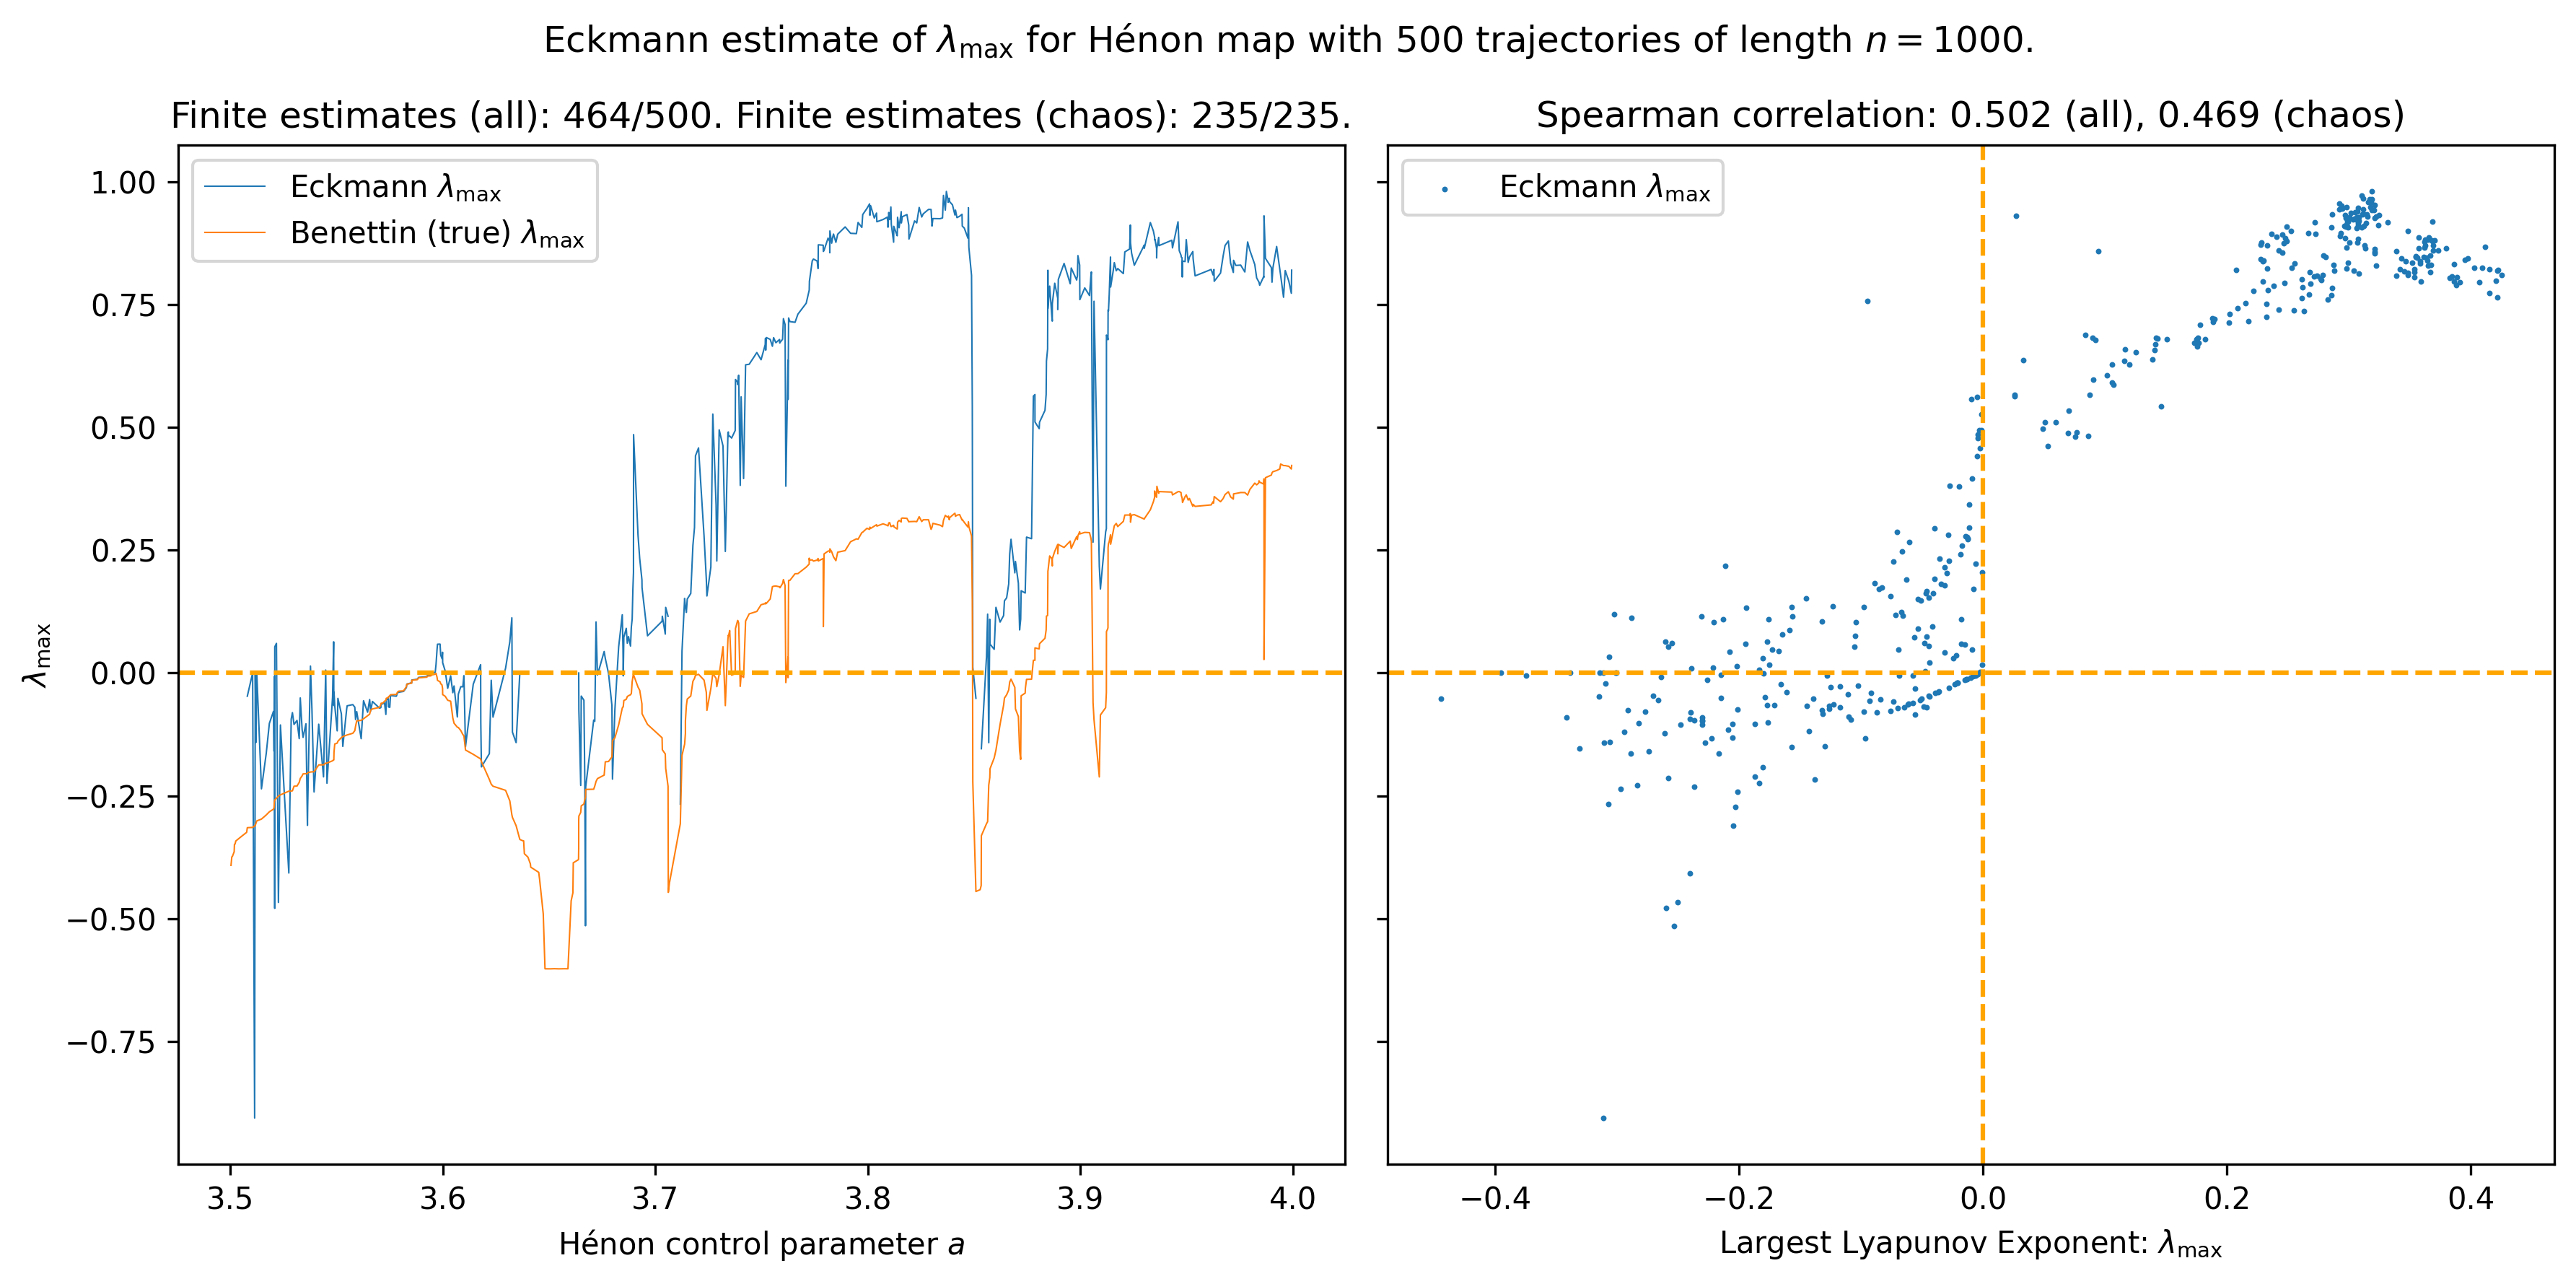

(SpearmanrResult(correlation=0.5024374690876039, pvalue=2.4370504267745277e-33),
 SpearmanrResult(correlation=0.4688155935902058, pvalue=3.0424935640552234e-14))

In [343]:
plot_lce_estimate_and_correlation("Eckmann", "Hénon", "a", eckmann_henon, henon_lces, logy=False)

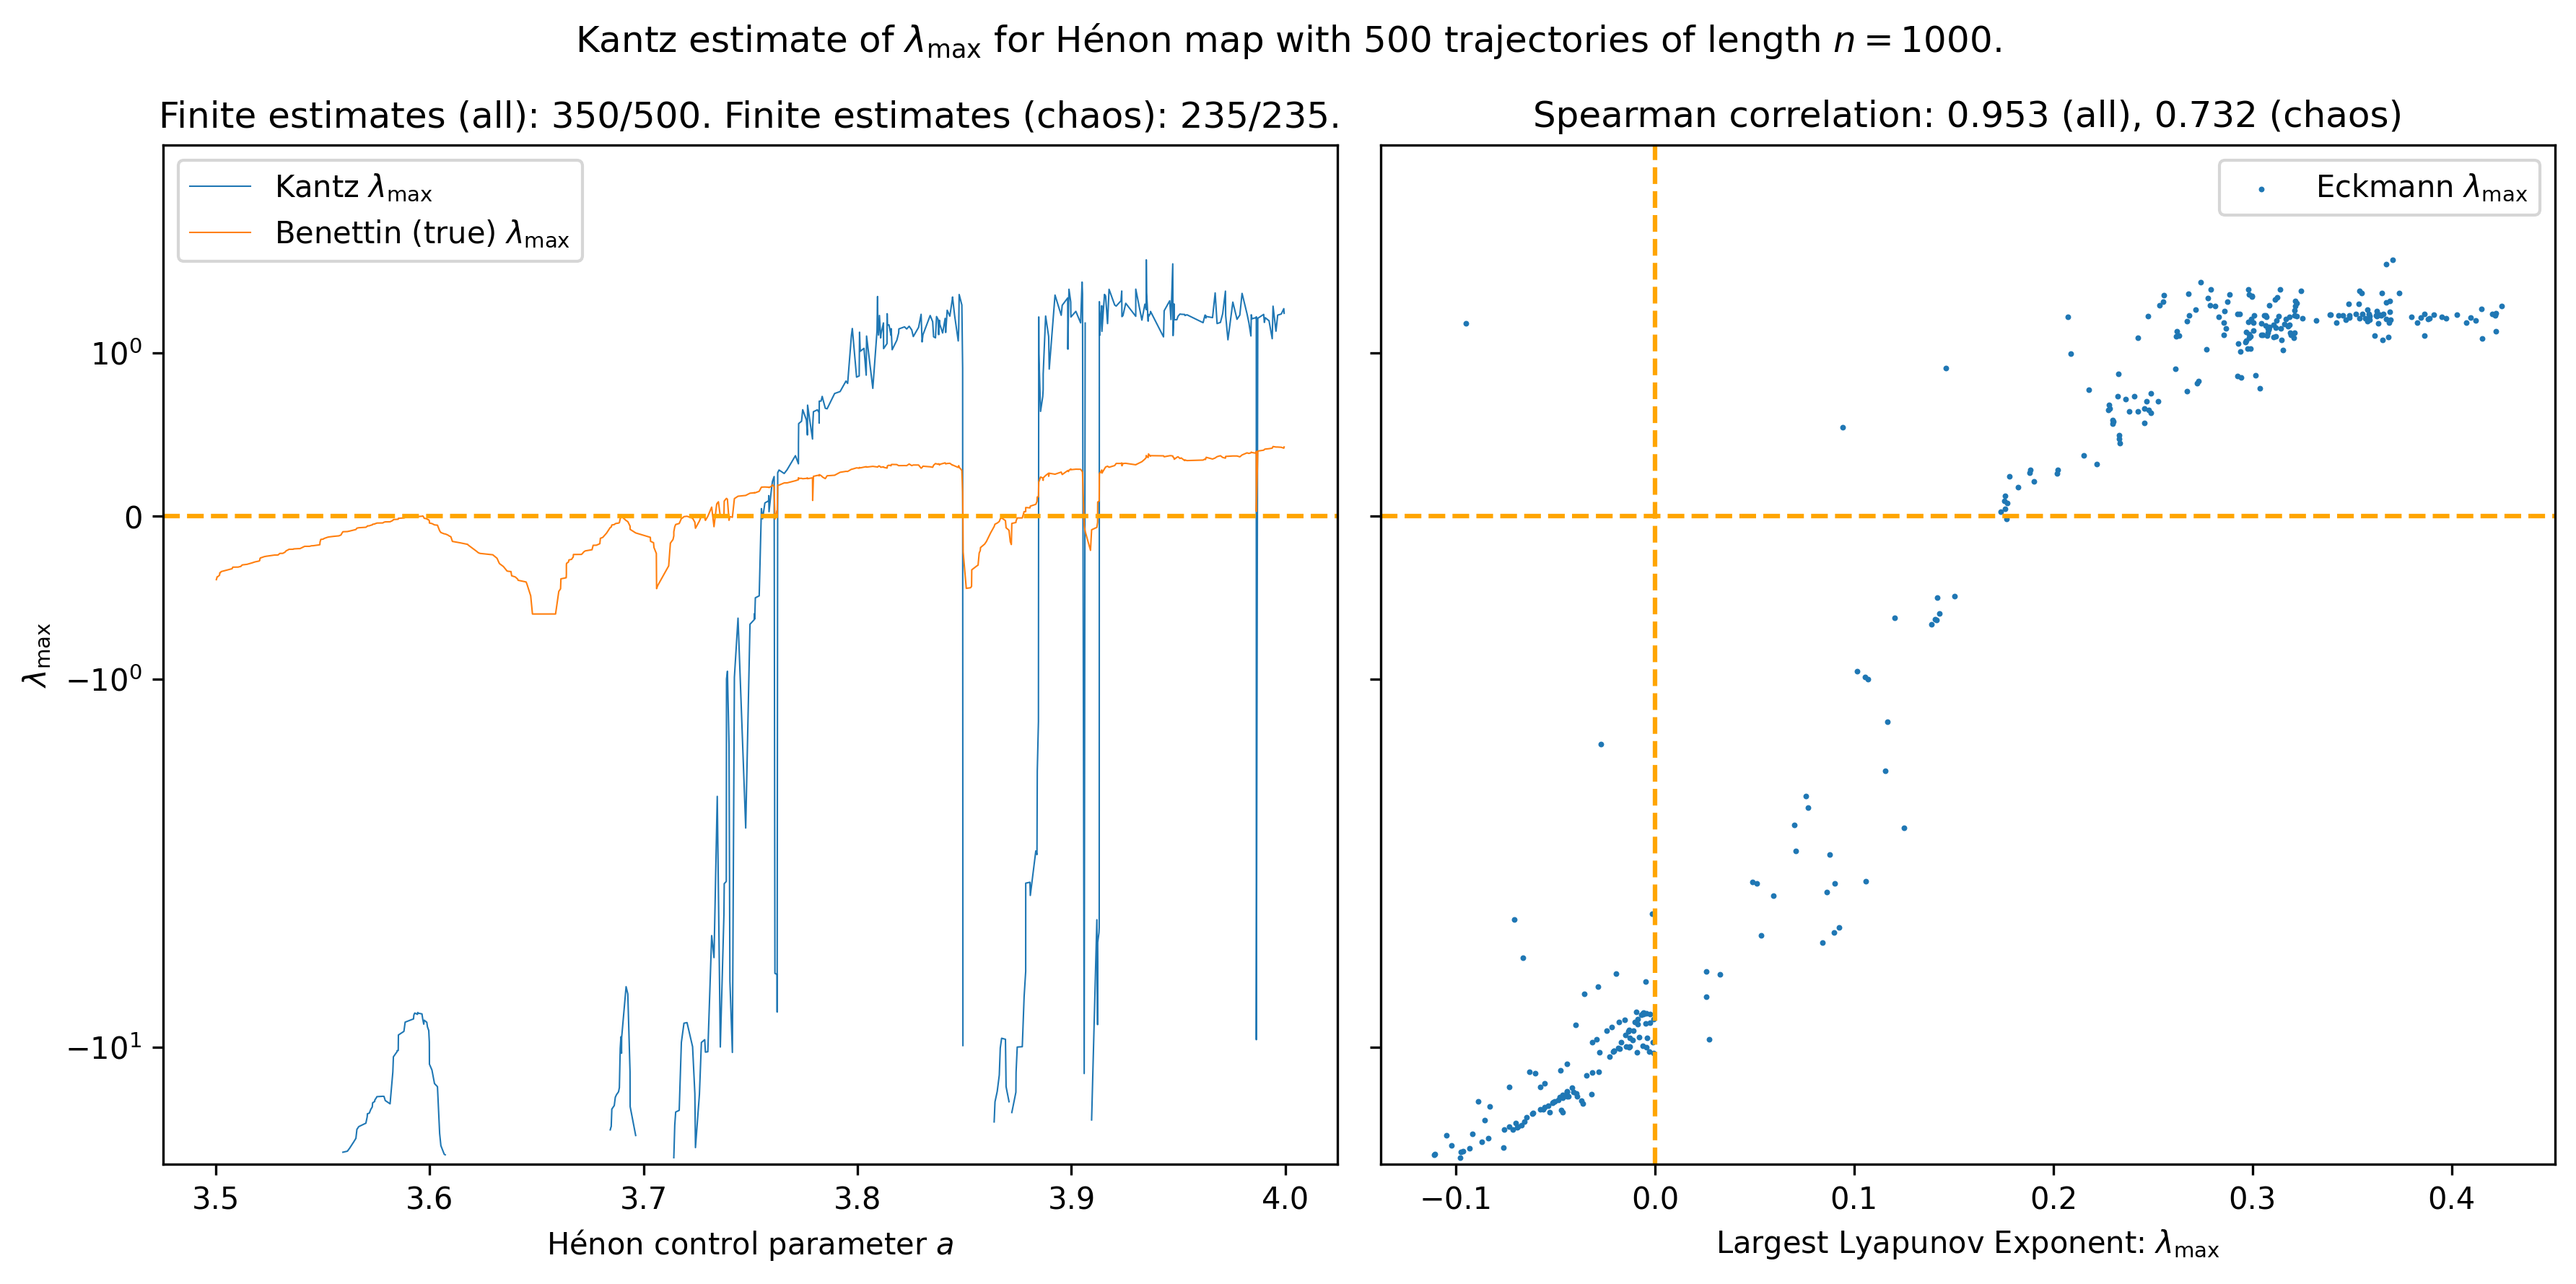

(SpearmanrResult(correlation=0.9526700737358844, pvalue=1.1206921062675e-259),
 SpearmanrResult(correlation=0.7320138330235697, pvalue=1.0423541281907566e-40))

In [344]:
plot_lce_estimate_and_correlation("Kantz", "Hénon", "a", kantz_henon, henon_lces, logy=True)

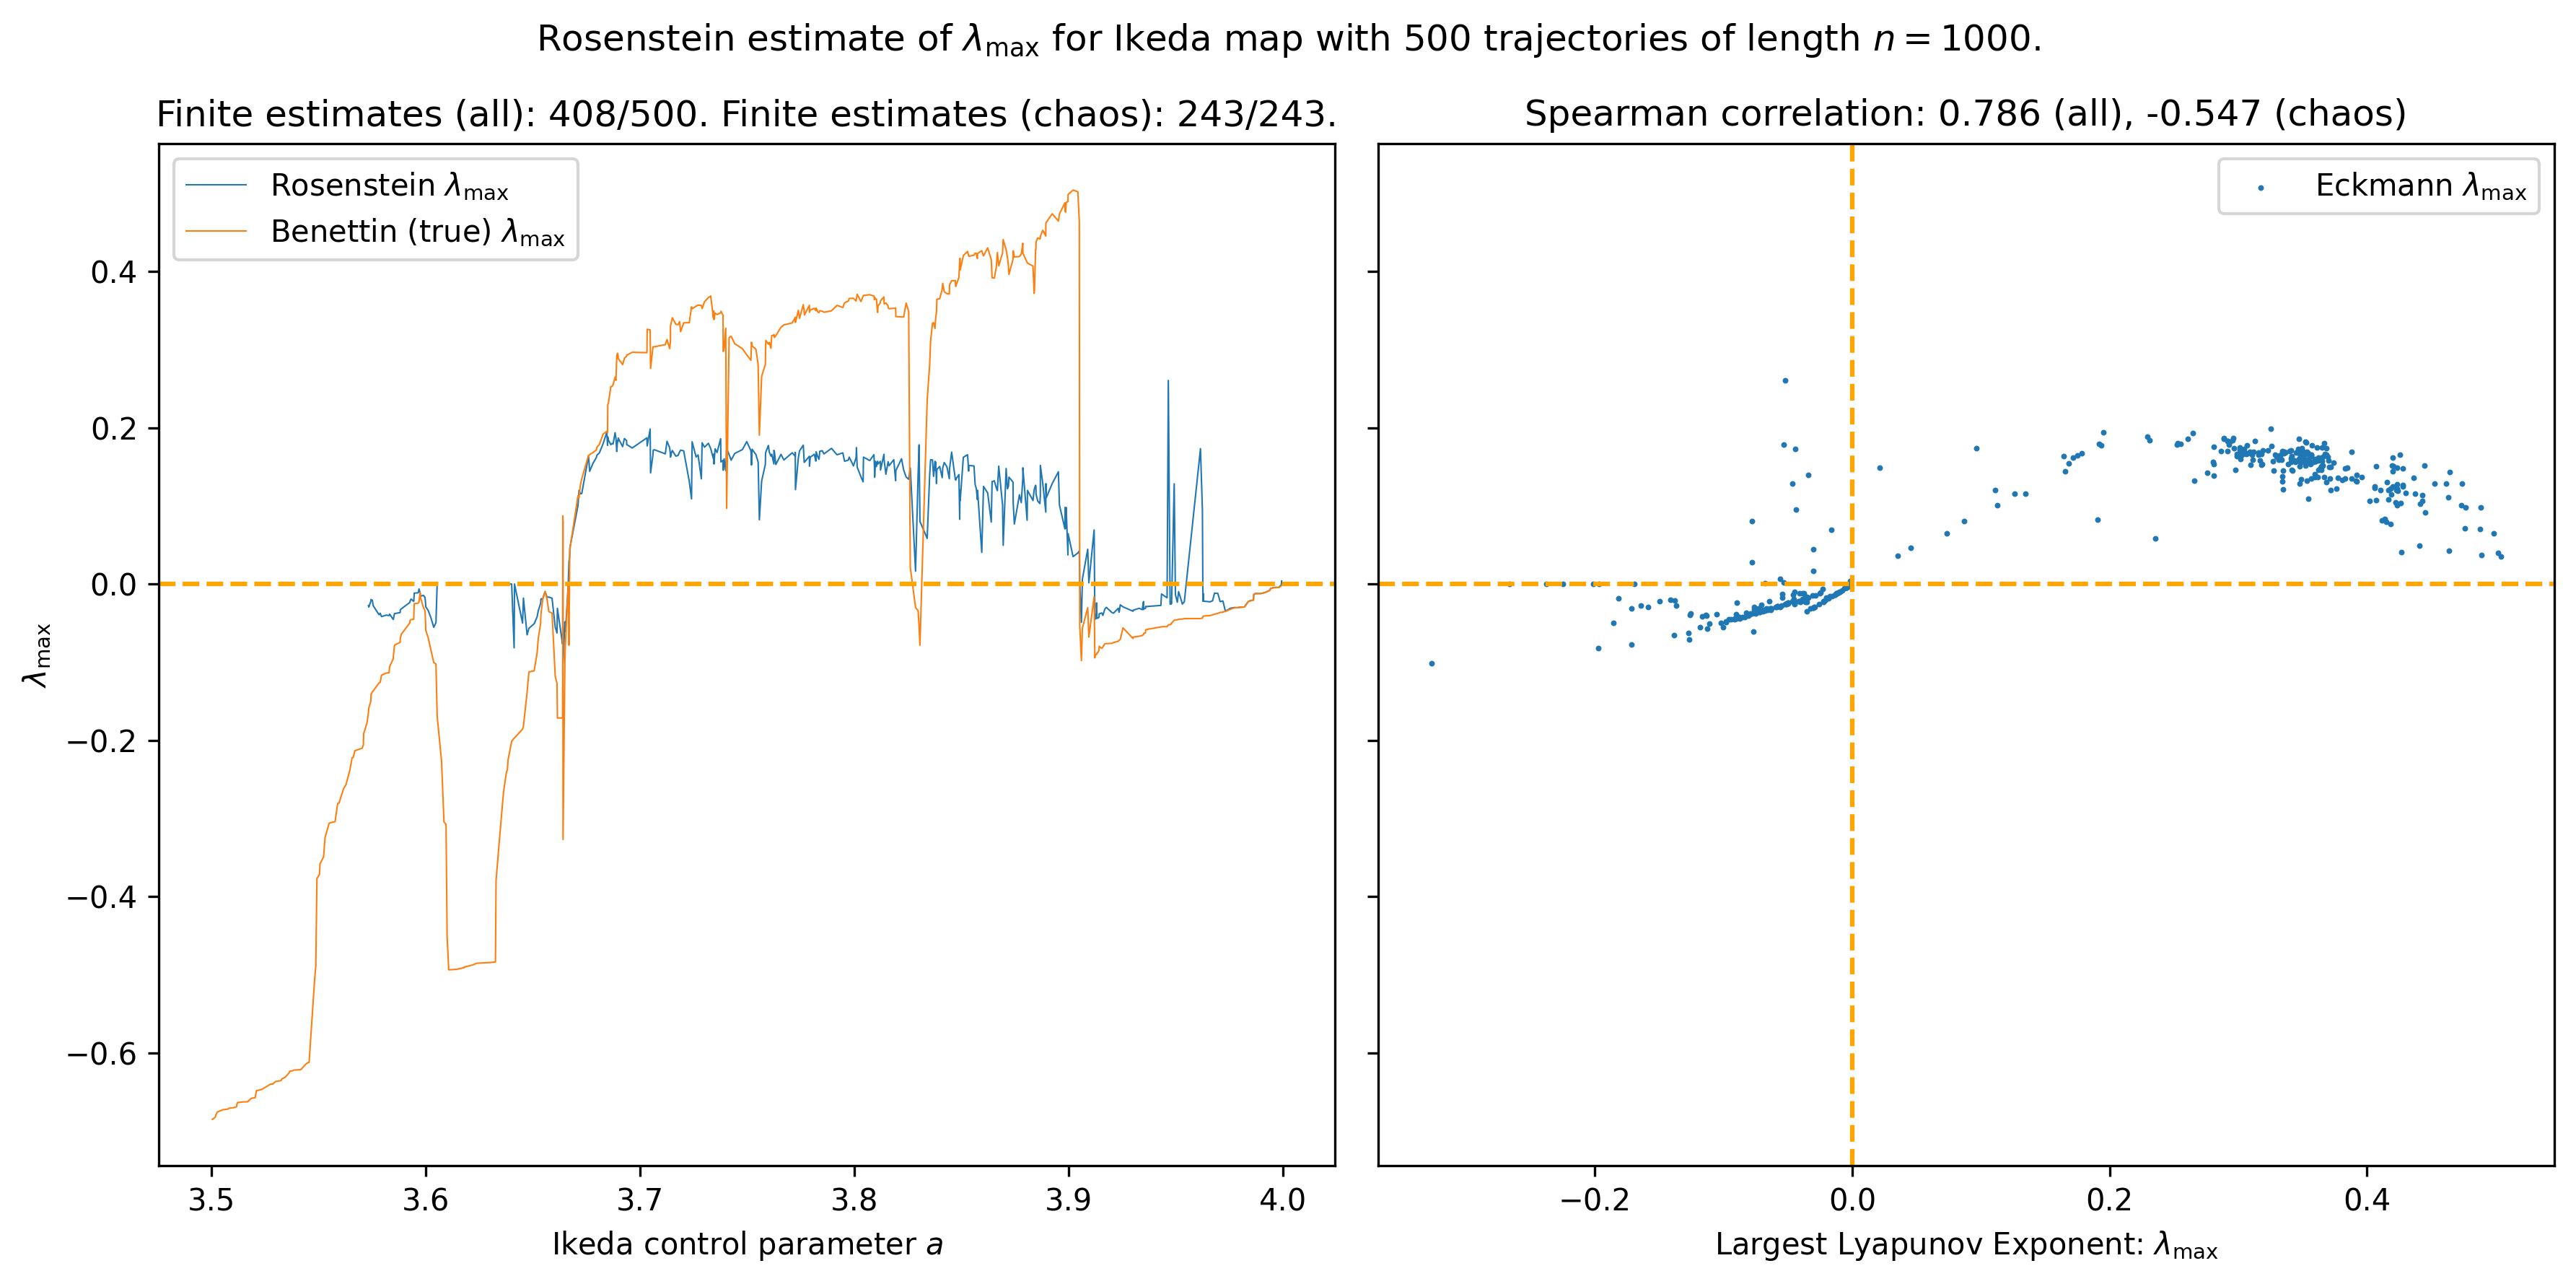

(SpearmanrResult(correlation=0.7858971122727425, pvalue=4.948420799891761e-106),
 SpearmanrResult(correlation=-0.546720726055053, pvalue=2.4257168881873987e-20))

In [345]:
plot_lce_estimate_and_correlation("Rosenstein", "Ikeda", "a", rosenstein_ikeda, ikeda_lces, logy=False)

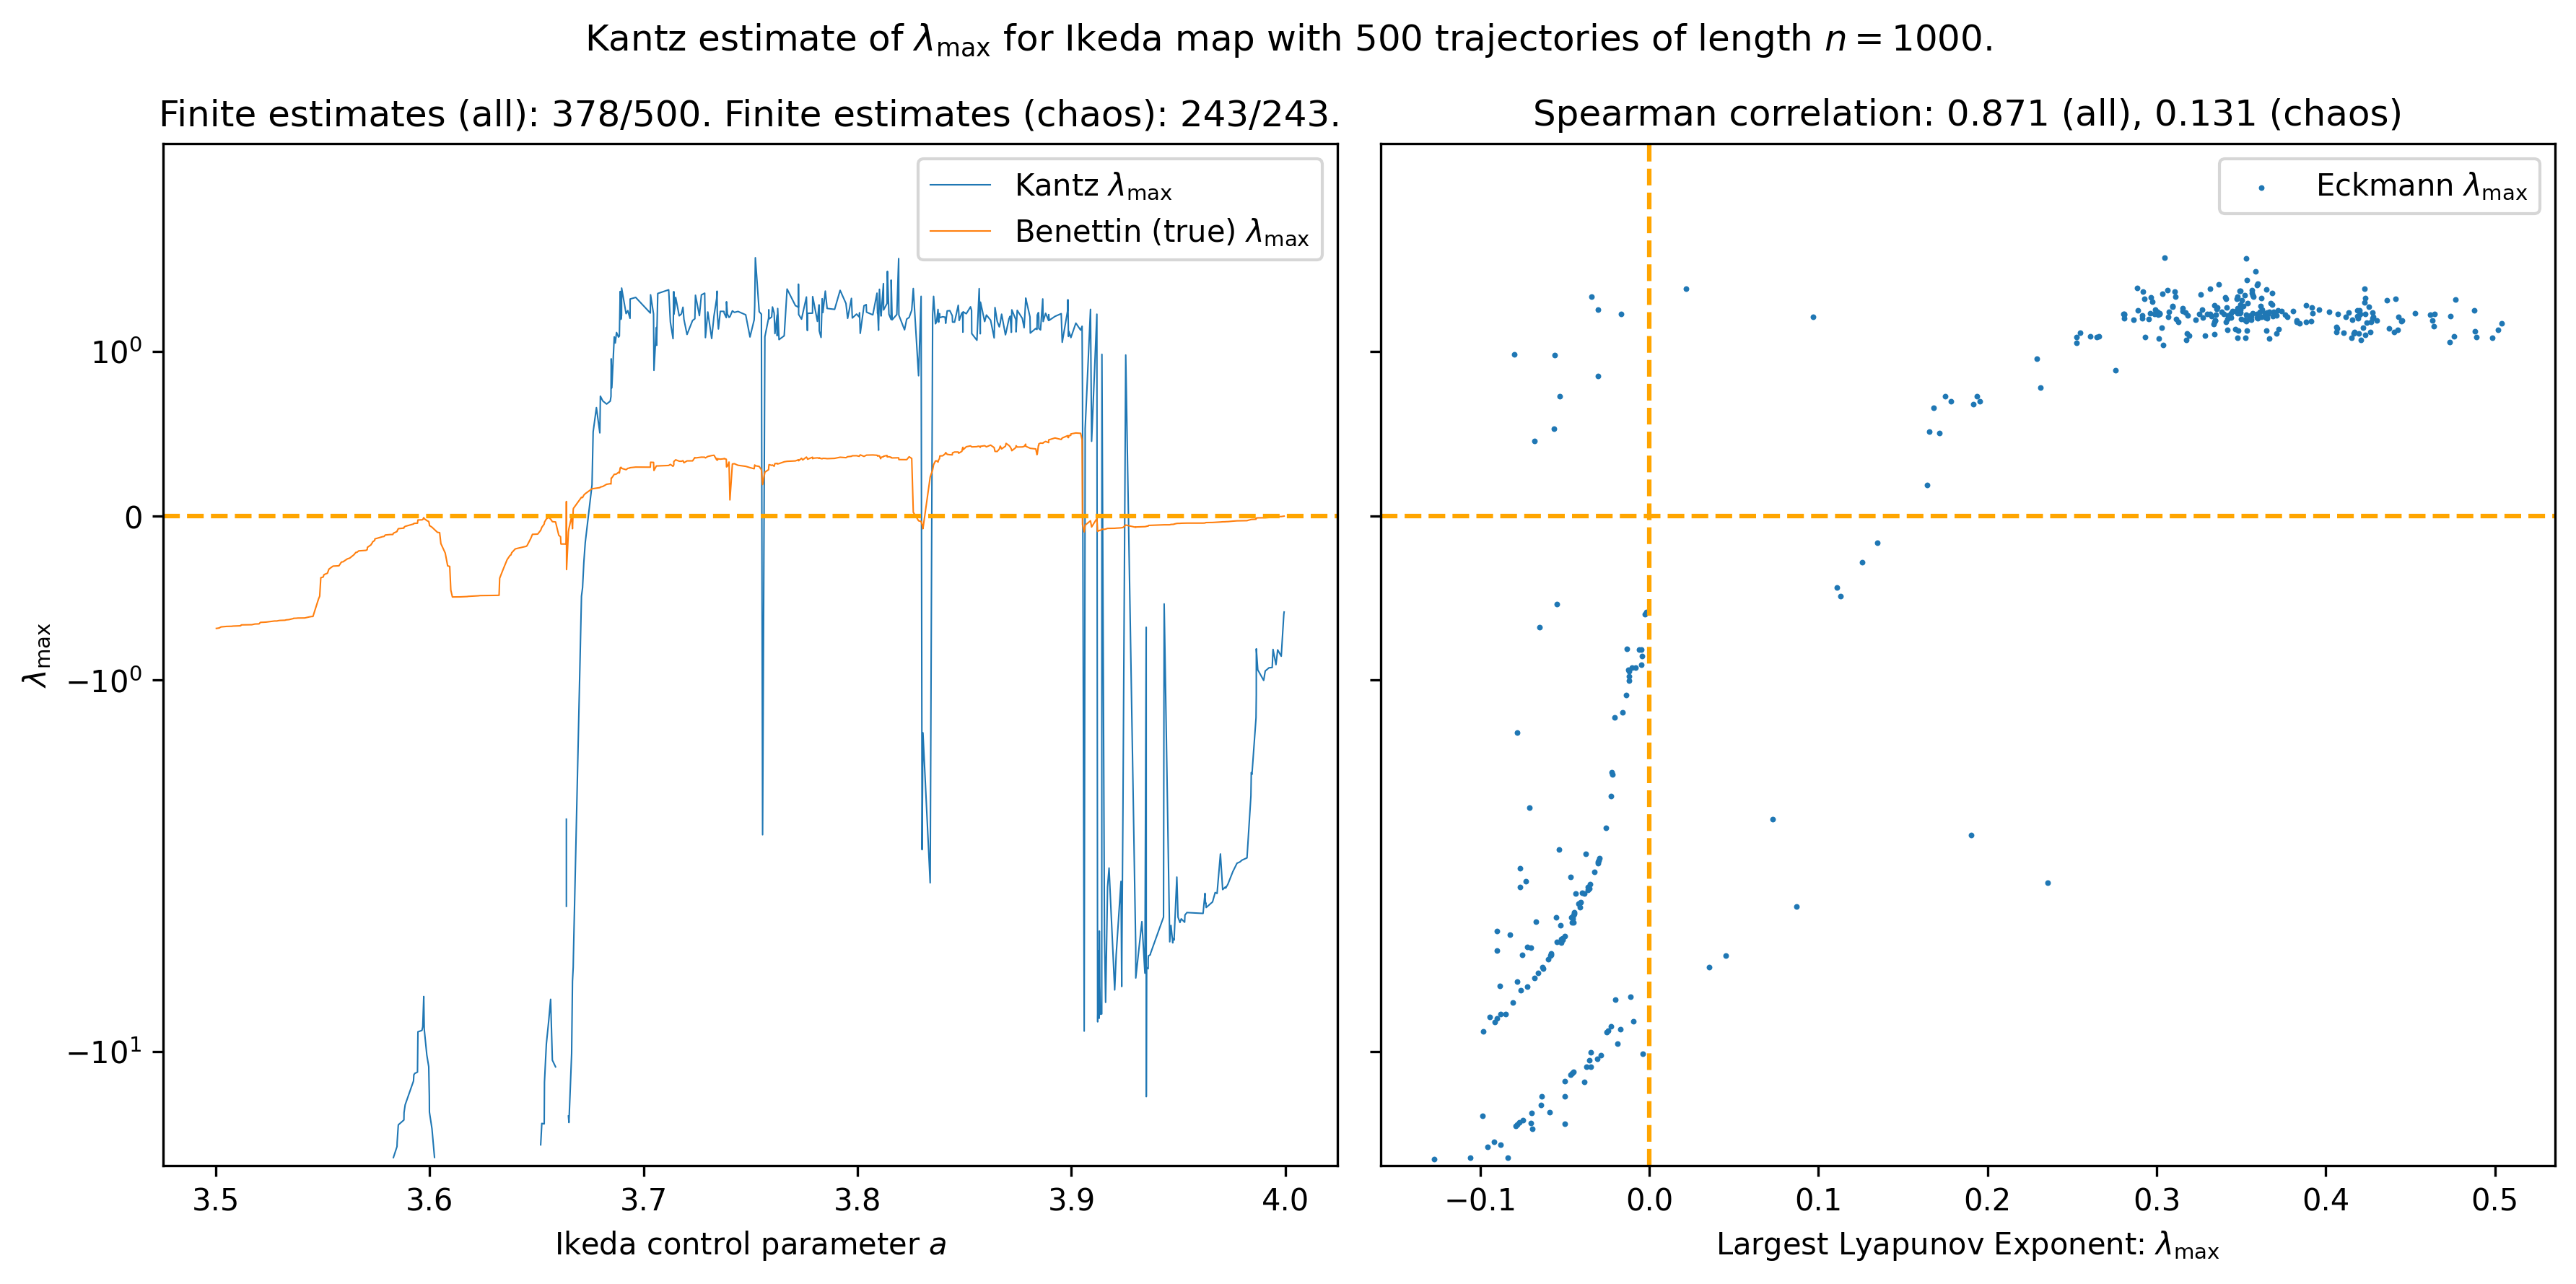

(SpearmanrResult(correlation=0.8712901546162765, pvalue=4.668118087429853e-156),
 SpearmanrResult(correlation=0.13121611879684406, pvalue=0.04097777802928724))

In [346]:
plot_lce_estimate_and_correlation("Kantz", "Ikeda", "a", kantz_ikeda, ikeda_lces, logy=True)

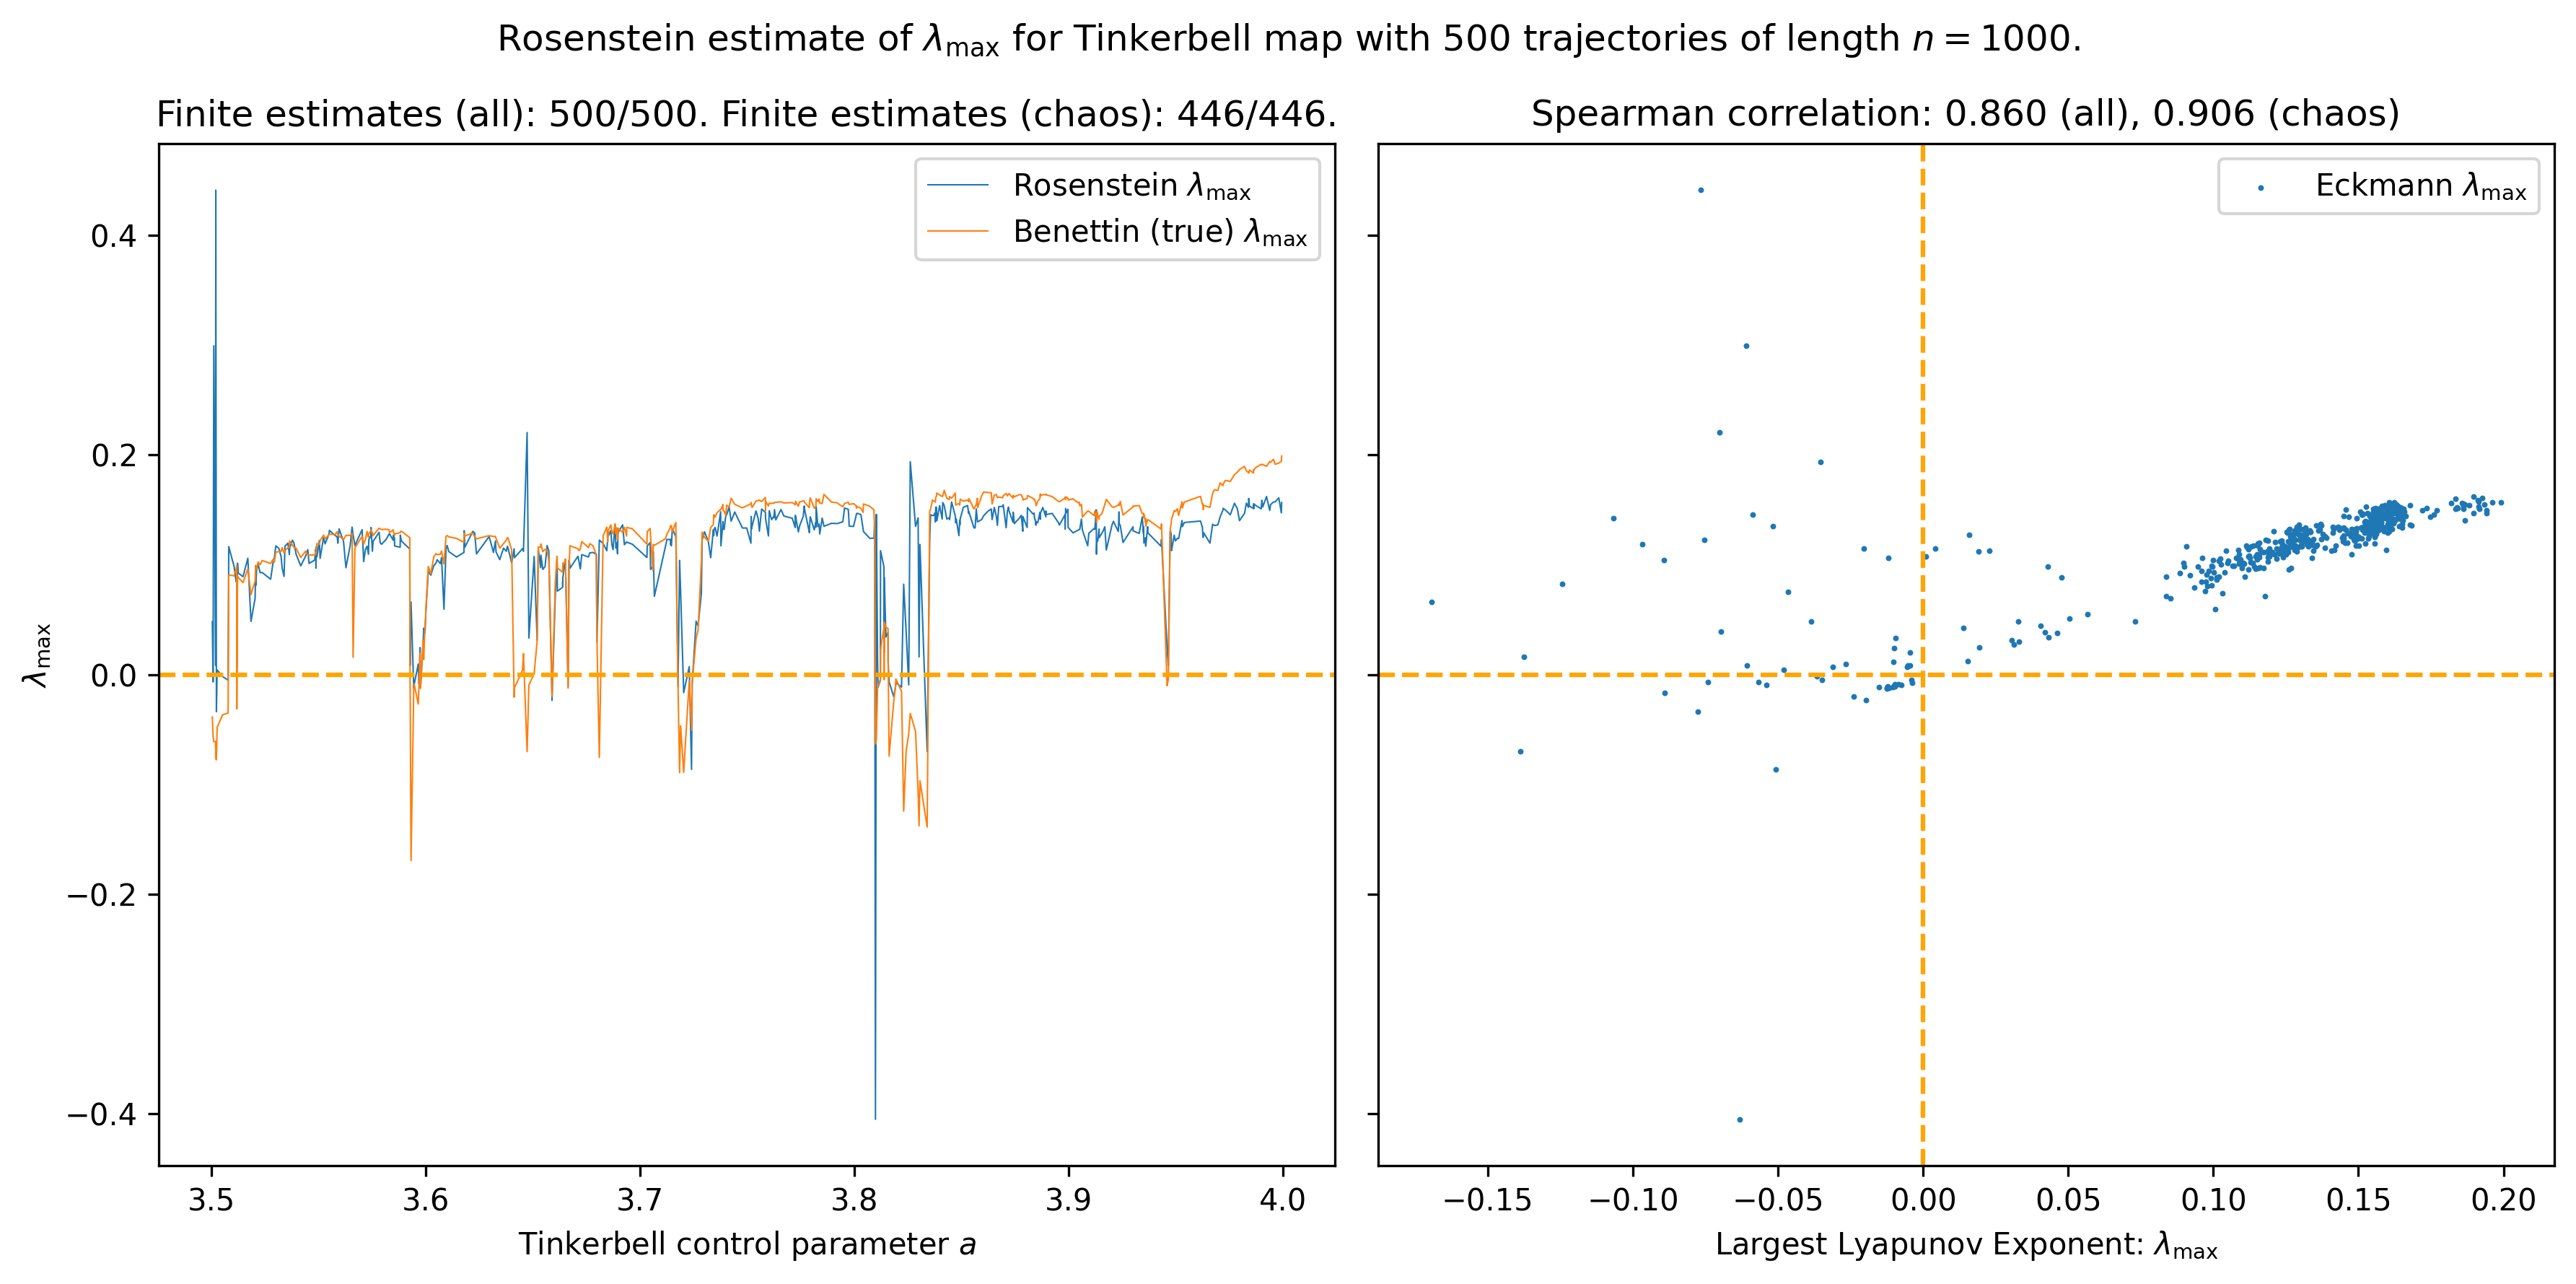

(SpearmanrResult(correlation=0.8595059340237361, pvalue=2.920006507211888e-147),
 SpearmanrResult(correlation=0.9056593679906317, pvalue=1.4928160864598723e-167))

In [347]:
plot_lce_estimate_and_correlation("Rosenstein", "Tinkerbell", "a", rosenstein_tinkerbell, tinkerbell_lces, logy=False)

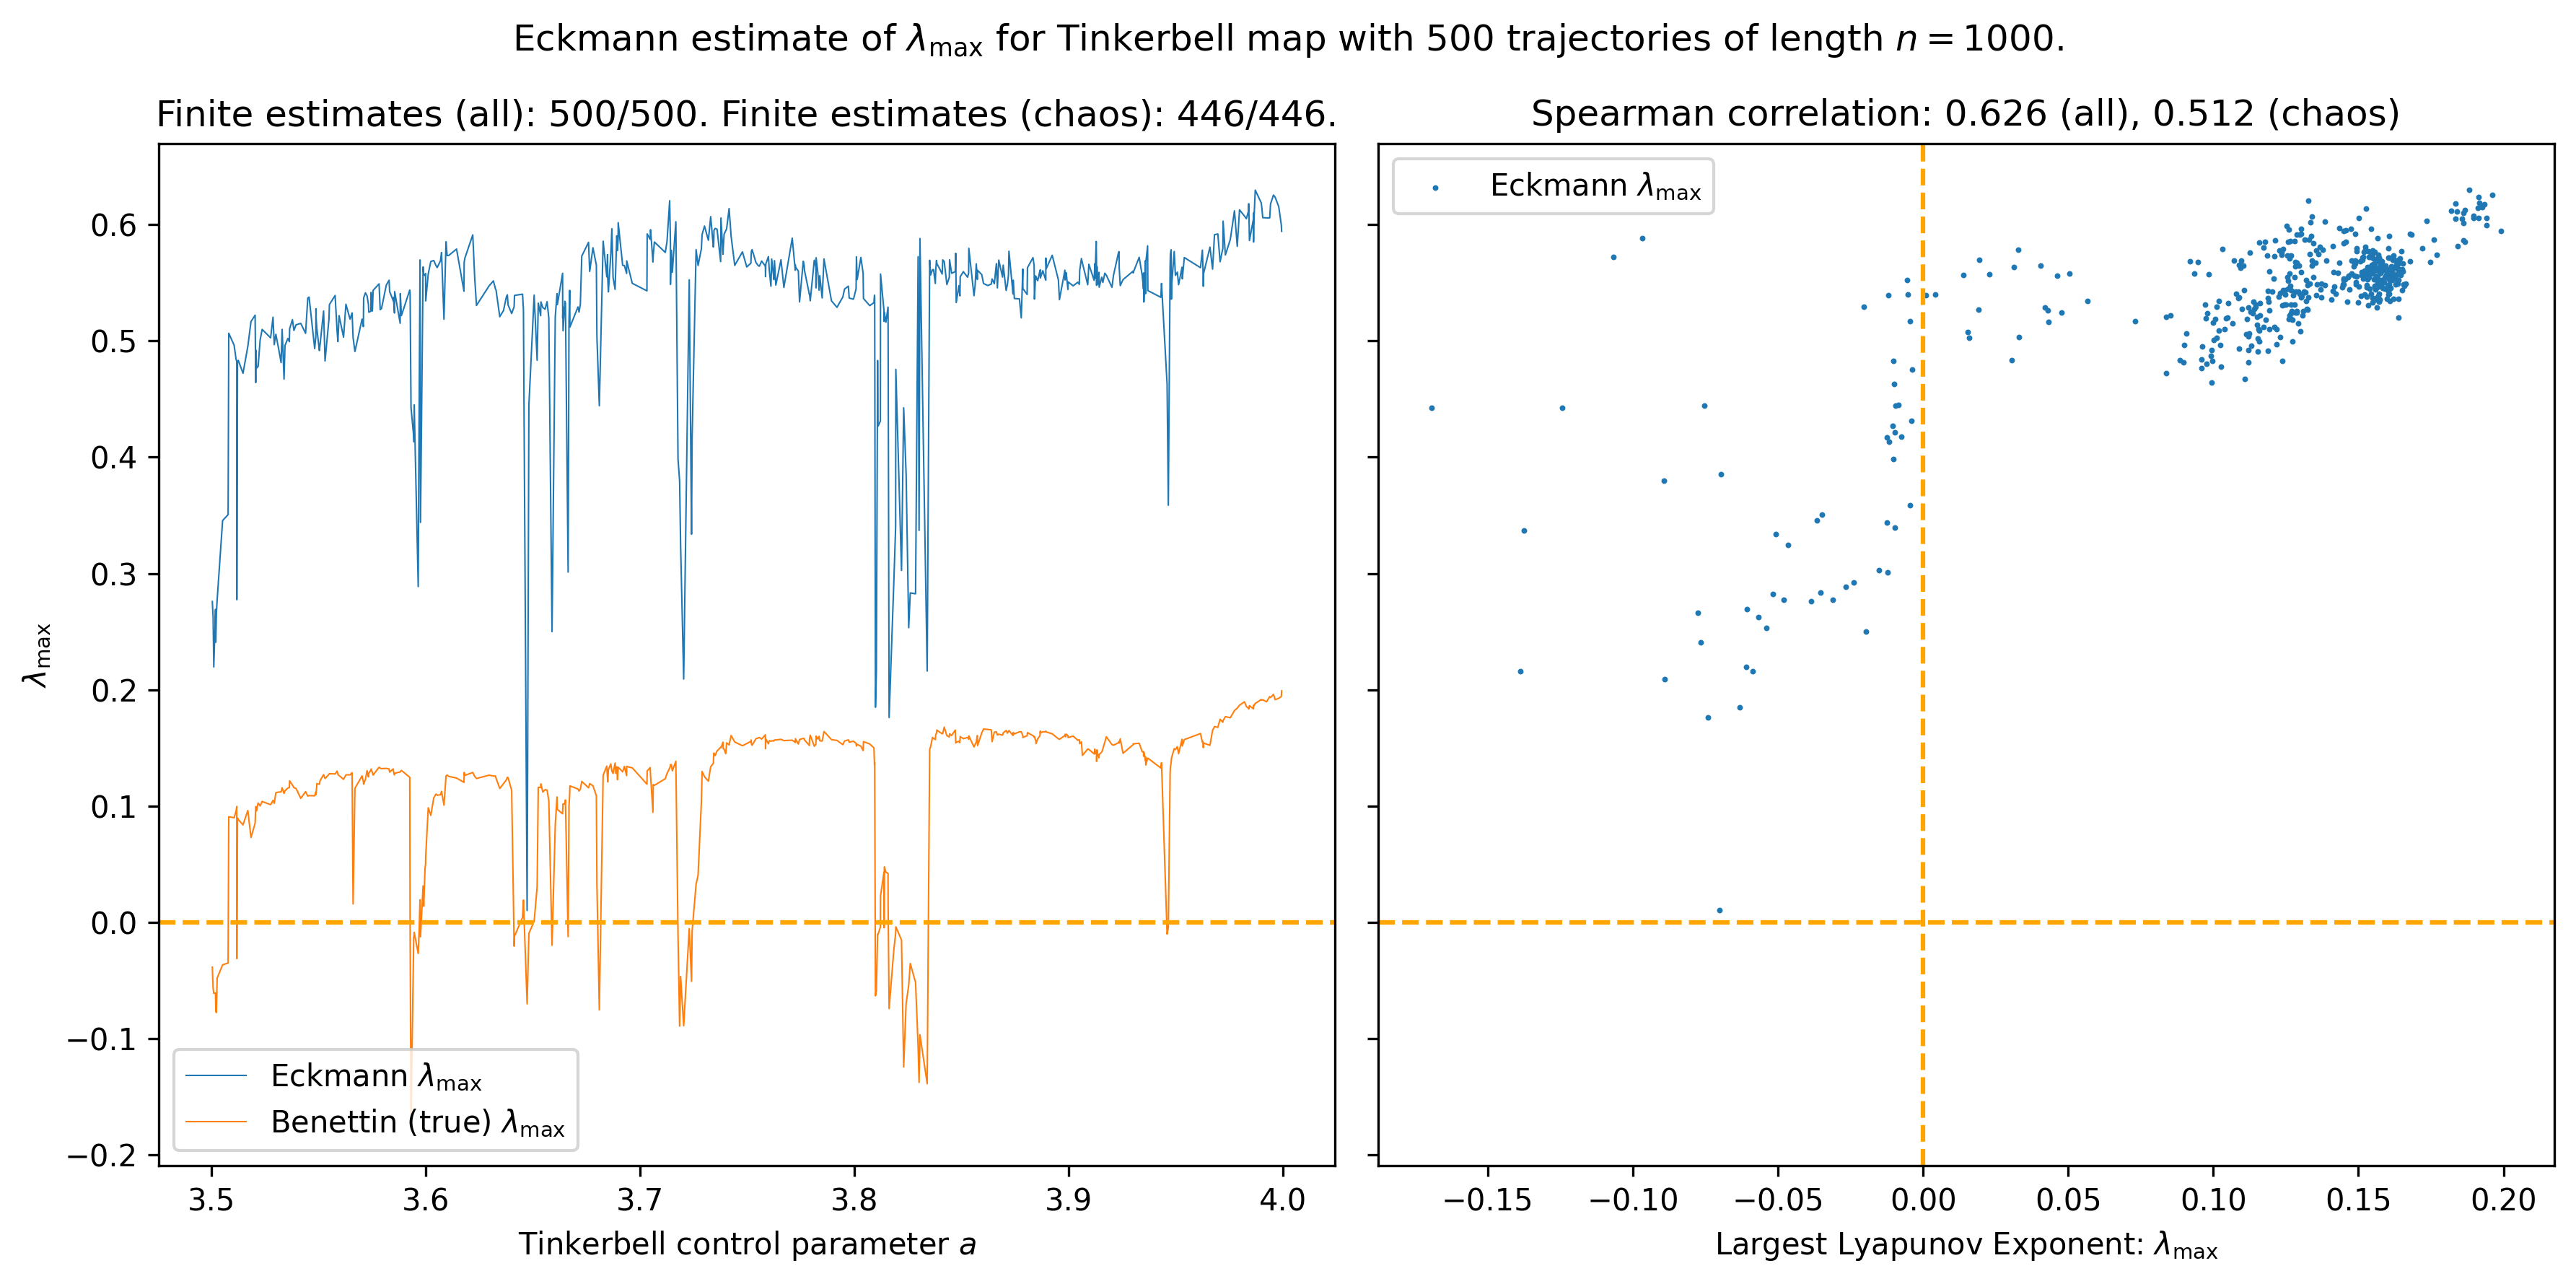

(SpearmanrResult(correlation=0.6263708254833019, pvalue=7.697847751005744e-56),
 SpearmanrResult(correlation=0.5123849123648258, pvalue=3.190631344722502e-31))

In [348]:
plot_lce_estimate_and_correlation("Eckmann", "Tinkerbell", "a", eckmann_tinkerbell, tinkerbell_lces, logy=False)

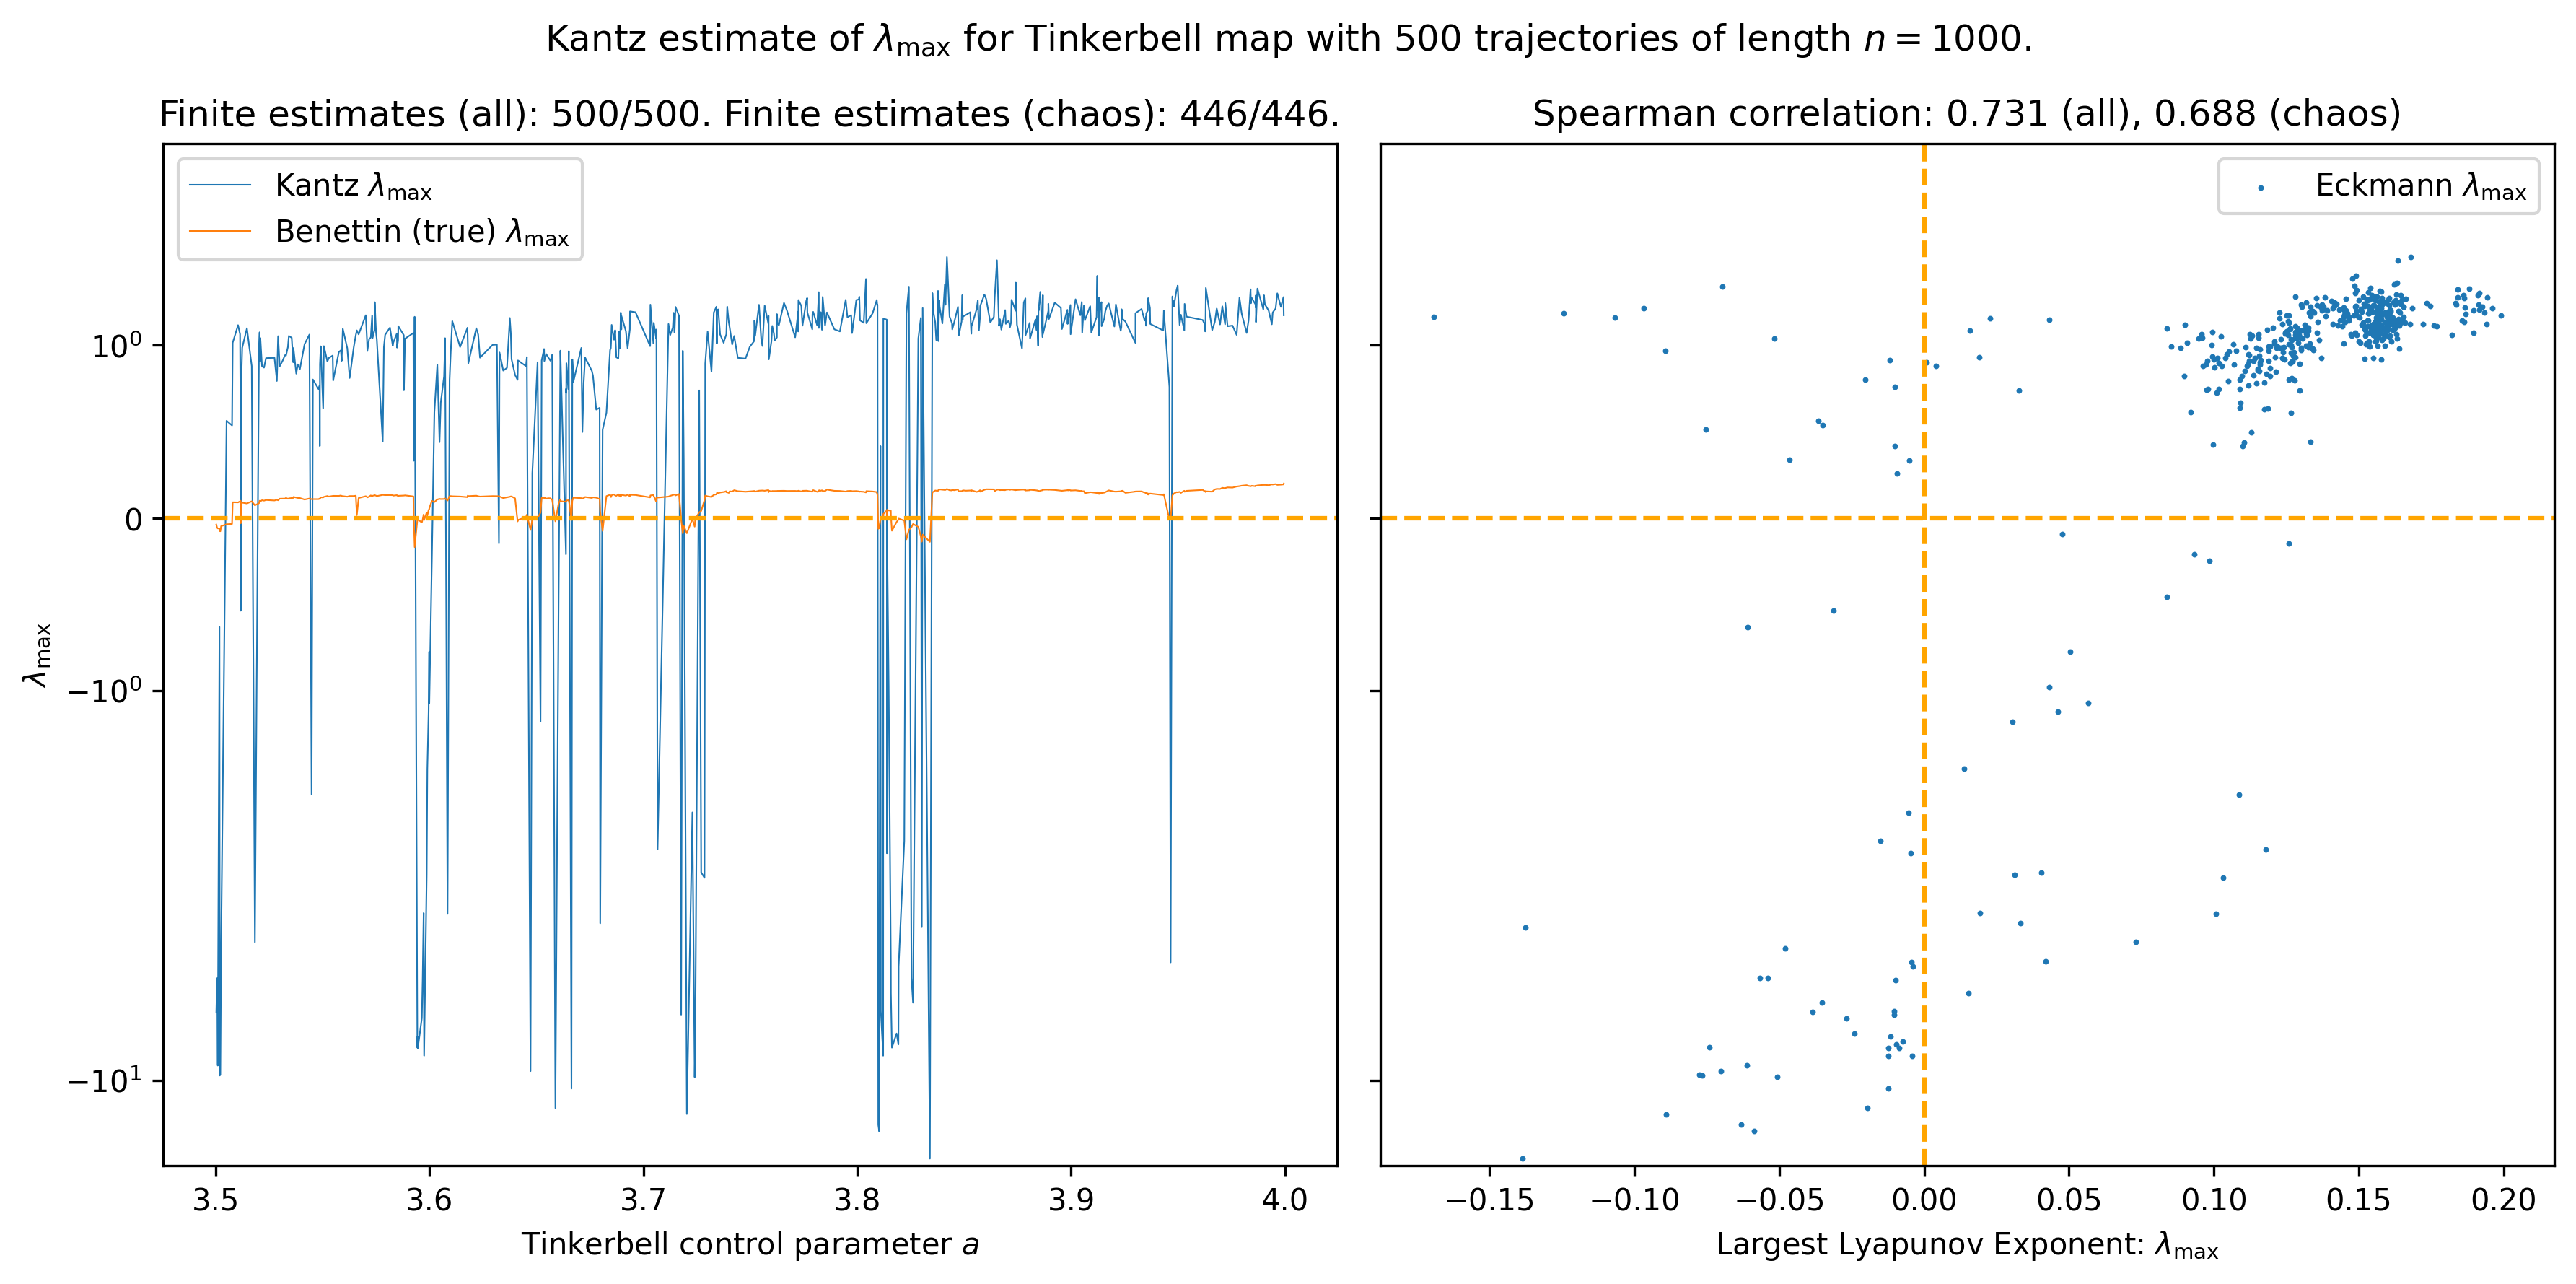

(SpearmanrResult(correlation=0.7307369709478837, pvalue=1.3247477532690007e-84),
 SpearmanrResult(correlation=0.6879658244631837, pvalue=8.452213887129197e-64))

In [349]:
plot_lce_estimate_and_correlation("Kantz", "Tinkerbell", "a", kantz_tinkerbell, tinkerbell_lces, logy=True)